# Problem Statement

This dataset is basically for a classification problem. But to practice linear regression, we will predict Temperature. Hence Temperature is our target column

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.stats.outliers_influence import variance_inflation_factor



In [2]:
np.random.RandomState(seed=42)

RandomState(MT19937) at 0x17EF7A3CA40

In [3]:
os.getcwd()

'h:\\My Drive\\Learning\\MachineLearning_DeepLearning\\PYTHON\\Ineuron_FSDS_course\\ML\\LinearRegression\\TASK'

# Read data and basic cleaning

## Keep header=1, drop index
1. keep header = 1 (skipping "Bejaia Region Dataset" row)
2. drop index=122,123 and put "Bejaia Region"=0 and "Sidi-Bel Abbes Region"=1

In [4]:
df = pd.read_csv('../../Datasets/Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [5]:
df.iloc[122:124, :]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
df_bejaia = df.iloc[df.index<122]
df_bejaia['Region'] = 0
df_bejaia.tail()

C:\Users\bhavi\AppData\Local\Temp\ipykernel_26856\2826318484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bejaia['Region'] = 0


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0


In [7]:
df_Sidi_Bel_Abbes = df[df.index>=124]
df_Sidi_Bel_Abbes['Region'] = 1
df_Sidi_Bel_Abbes.tail()

C:\Users\bhavi\AppData\Local\Temp\ipykernel_26856\1180375950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Sidi_Bel_Abbes['Region'] = 1


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [8]:
df = pd.concat(objs=[df_bejaia,df_Sidi_Bel_Abbes],axis=0)
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,1
133,10,06,2012,30,41,15,0,89.4,13.3,22.5,8.4,13.1,10,fire,1
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
216,01,09,2012,29,86,16,0,37.9,0.9,8.2,0.1,1.4,0,not fire,1
55,26,07,2012,36,53,19,0,89.2,17.1,98.6,10,23.9,15.3,fire,0


## Strip column names
1. df["Classes"] this gives error because of extra space at the end (see below)
2. let's strip and reassign the column names

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

## Basic info on data

In [11]:
df.shape

(244, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [14]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

## Strip 'Classes' column

In [15]:
# strip 'Classes' to get proper names
df['Classes'].str.strip().nunique()

2

In [16]:
df['Classes'] = df['Classes'].str.strip()

In [17]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [18]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [19]:
# search for nan in 'Classes'
filter = (df['Classes']=='fire') | (df['Classes']=='not fire')
df.drop(df.loc[~filter].index, inplace=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [20]:
df.shape # 1 row dropped

(243, 15)

In [21]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
131,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire,1
63,03,08,2012,35,63,14,0.3,76.6,5.7,10,1.7,5.5,0.8,not fire,0
130,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire,1
78,18,08,2012,36,54,18,0,89.4,20,110.9,9.7,27.5,16.1,fire,0
133,10,06,2012,30,41,15,0,89.4,13.3,22.5,8.4,13.1,10,fire,1


## Check duplicates

In [22]:
df.duplicated().sum()

0

## Encode 'Classes' column to 0 or 1

In [23]:
print(df['Classes'].unique())

['not fire' 'fire']


In [24]:
df['Classes'] = np.where(df['Classes']=='not fire',0,1)

In [25]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,0


## Set dtypes and (year=2012, no variance hence dropped)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    int32 
 14  Region       243 non-null    int64 
dtypes: int32(1), int64(1), object(13)
memory usage: 29.4+ KB


In [27]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [28]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [29]:
# There is no variance, because entire data is for 2012. We will drop this column
df['year'].unique()

array(['2012'], dtype=object)

In [30]:
df.drop(labels=['year'], axis=1, inplace=True)


In [31]:
df.sample(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
7,08,06,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
151,28,06,37,37,13,0,92.5,27.2,52.4,11.7,27.1,18.4,1,1
210,26,08,33,37,16,0,92.2,61.3,167.2,13.1,64,30.3,1,1
161,08,07,35,47,18,6,80.8,9.8,9.7,3.1,9.4,3,1,1
35,06,07,32,63,14,0,87,10.9,37,5.6,12.5,6.8,1,0


In [32]:
print(df['Temperature'].unique())
print(df['RH'].unique())
print(df['Ws'].unique())

['29' '26' '25' '27' '31' '33' '30' '28' '32' '34' '35' '36' '37' '22'
 '24' '38' '39' '40' '42']
['57' '61' '82' '89' '77' '67' '54' '73' '88' '79' '65' '81' '84' '78'
 '80' '55' '62' '66' '64' '53' '47' '50' '68' '75' '76' '63' '69' '70'
 '59' '48' '45' '60' '51' '52' '58' '86' '74' '71' '49' '44' '41' '42'
 '90' '87' '72' '46' '37' '36' '56' '43' '83' '29' '34' '33' '35' '39'
 '31' '21' '40' '24' '38' '26']
['18' '13' '22' '16' '14' '15' '12' '19' '21' '20' '17' '26' '11' '10' '9'
 '8' '6' '29']


In [33]:
df = df.astype({'day':int,
'month':int,
'Temperature':int,
'RH':int,
'Ws':int,
'Rain':float,
'FFMC':float,
'DMC':float,
'DC':float,
'ISI':float,
'BUI':float,
'FWI':float})

In [34]:
df.dtypes

day              int32
month            int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int64
dtype: object

In [35]:
df['Region'] = df['Region'].astype('int32')
df.dtypes

day              int32
month            int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int32
dtype: object

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   Temperature  243 non-null    int32  
 3   RH           243 non-null    int32  
 4   Ws           243 non-null    int32  
 5   Rain         243 non-null    float64
 6   FFMC         243 non-null    float64
 7   DMC          243 non-null    float64
 8   DC           243 non-null    float64
 9   ISI          243 non-null    float64
 10  BUI          243 non-null    float64
 11  FWI          243 non-null    float64
 12  Classes      243 non-null    int32  
 13  Region       243 non-null    int32  
dtypes: float64(7), int32(7)
memory usage: 21.8 KB


# Create column description dataframe

Handy for future use

In [37]:
desc = ["Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations",
"Month : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations",
"Temperature noon (temperature max) in Celsius degrees: 22 to 42",
"Relative Humidity in %: 21 to 90",
"Wind speed in km/h: 6 to 29",
"total rain in mm: 0 to 16.8",
"Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5",
"Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9",
"Drought Code (DC) index from the FWI system: 7 to 220.4",
"Initial Spread Index (ISI) index from the FWI system: 0 to 18.5",
"Buildup Index (BUI) index from the FWI system: 1.1 to 68",
"Fire Weather Index (FWI) Index: 0 to 31.1",
"Classes : 'not fire'=0 and 'fire'=1",
"Region : 'Bejaia Region'=0 and 'Sidi-Bel Abbes Region'=1"]

In [38]:
if len(desc)==len(df.columns):
    print('correct')

correct


In [39]:
df_desc = pd.Series(data=desc)
df_desc.index = df.columns
df_desc

day            Date : (DD/MM/YYYY) Day, month ('june' to 'sep...
month          Month : (DD/MM/YYYY) Day, month ('june' to 'se...
Temperature    Temperature noon (temperature max) in Celsius ...
RH                              Relative Humidity in %: 21 to 90
Ws                                   Wind speed in km/h: 6 to 29
Rain                                 total rain in mm: 0 to 16.8
FFMC           Fine Fuel Moisture Code (FFMC) index from the ...
DMC            Duff Moisture Code (DMC) index from the FWI sy...
DC             Drought Code (DC) index from the FWI system: 7...
ISI            Initial Spread Index (ISI) index from the FWI ...
BUI            Buildup Index (BUI) index from the FWI system:...
FWI                    Fire Weather Index (FWI) Index: 0 to 31.1
Classes                      Classes : 'not fire'=0 and 'fire'=1
Region         Region : 'Bejaia Region'=0 and 'Sidi-Bel Abbes...
dtype: object

In [40]:
df_desc.loc['DMC']

'Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9'

In [41]:
df.sample(5)

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
145,22,6,33,46,14,1.1,78.3,8.1,8.3,1.9,7.7,1.2,0,1
164,11,7,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1
26,27,6,34,53,18,0.0,89.0,21.6,80.3,9.2,25.8,15.0,1,0
51,22,7,28,79,18,0.1,73.4,16.4,79.9,1.8,21.7,2.8,0,0
28,29,6,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,0,0


# Export cleaned data

In [42]:
df.to_csv("AlgerianForestDatasetCleaned.csv", index=None)

# EDA / Feature Engineering

Also check Homoscedasticity (possible in bivariate analysis) <br>

Homoscedasticity: assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)

In [43]:
# plt.style.available
plt.style.use('fivethirtyeight')

In [44]:
len(df.columns)

14

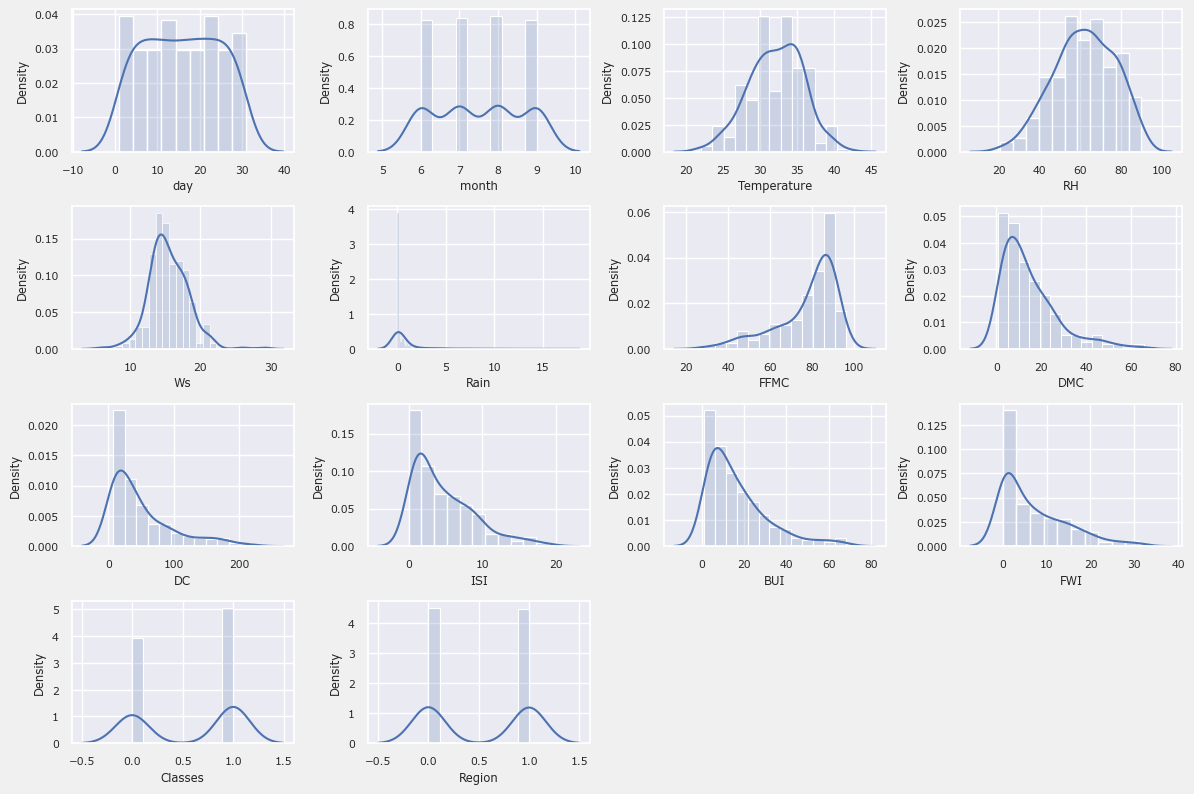

In [45]:
plt.figure(figsize=(12,8))
sns.set(font="Verdana", font_scale=0.7)
for i,col in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, alpha = 0.2, stat='density', kde_kws=dict(cut=3))
plt.tight_layout()

In [46]:
df['month'].nunique()

4

<AxesSubplot:xlabel='Rain', ylabel='Density'>

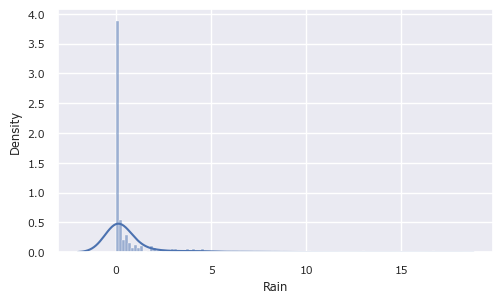

In [47]:
plt.figure(figsize=(5,3))
sns.histplot(df['Rain'], kde=True, kde_kws=dict(cut=3), stat='density')

## Observation

1. In general, most are right skewed so log transform should work
2. On left skewed data, we can try available transforms and check if required

In [48]:
cat_cols = ['month', 'Classes', 'Region']
num_cols = []
for col in df.columns:
    if col not in cat_cols:
        num_cols.append(col)

print('cat_cols: ', cat_cols)
print('num_cols: ',num_cols)
print('total cols: ', len(cat_cols)+len(num_cols))

cat_cols:  ['month', 'Classes', 'Region']
num_cols:  ['day', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
total cols:  14


## Graphs/Observations/Feature-selection

In [49]:
# independent numerical cols
num_cols_ind = [col for col in num_cols if col != 'Temperature']

### Boxplot on all numerical features

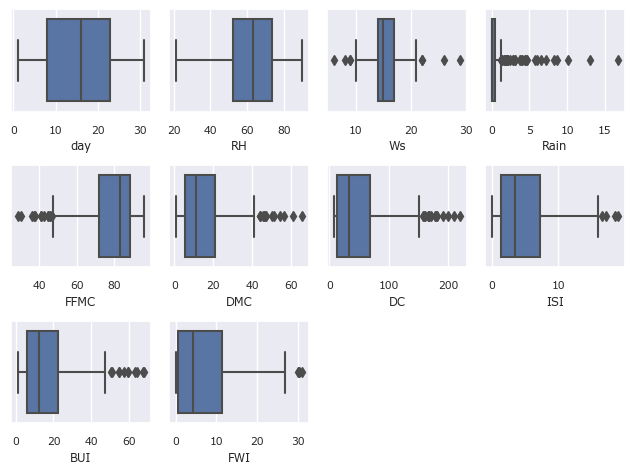

In [50]:
for i,col in enumerate(num_cols_ind):
    plt.subplot(3,4,i+1)
    sns.boxplot(data=df, x=col)

plt.tight_layout()

#### Observation

1. Outliers will be processed later, just before transformation
2. We cannot blindly remove them as they can be important

### Linear Correlation and Mutual info regression (MI) between numerical features and target

In [51]:
df[["day","Temperature"]].corr()


,day,Temperature
day,1.000000,0.097227
Temperature,0.097227,1.000000


In [52]:
df[["day","Temperature"]].corr().values.min()

0.09722655220582041

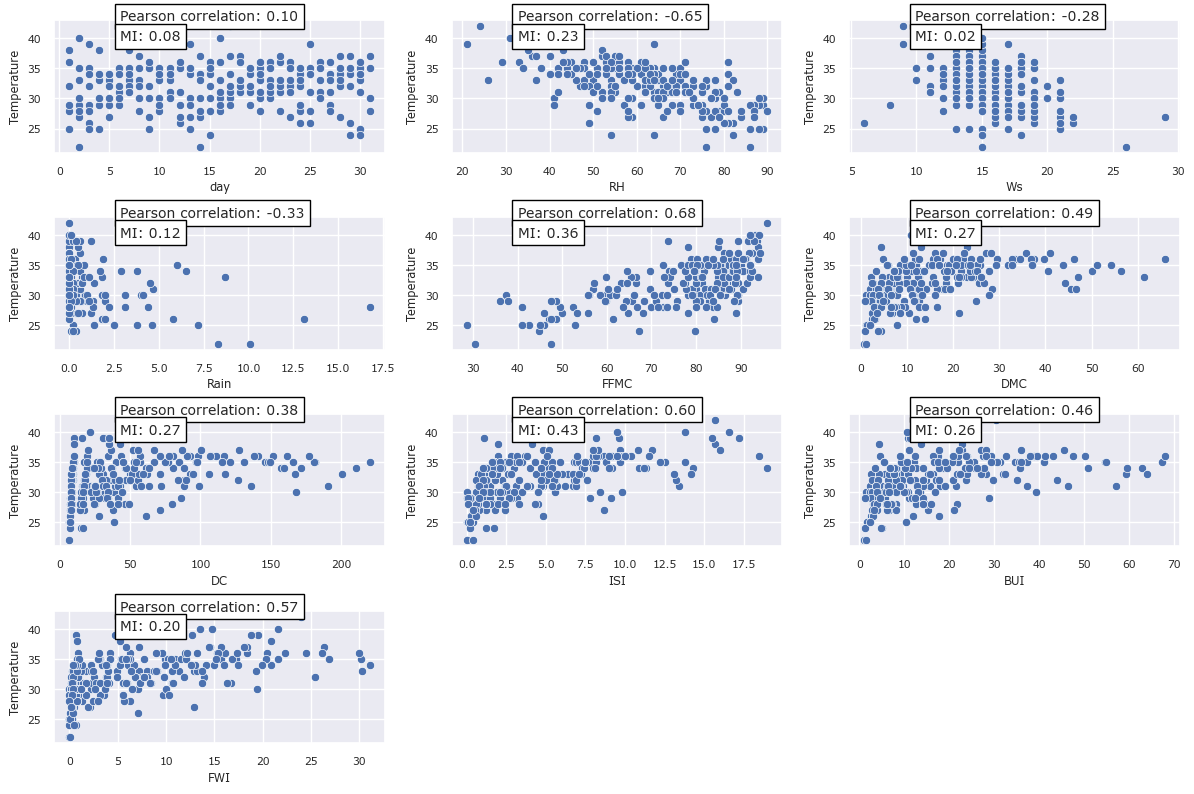

In [53]:
# relationship of numerical cols with dependent/Temperature col
corr_with_temp = []
plt.figure(figsize=(12,8))
for i,col in enumerate(num_cols_ind):
    plt.subplot(4,3,i+1)
    sns.scatterplot(data=df, x=col, y='Temperature')
    corr_ = df[[col,"Temperature"]].corr().values.min()
    corr_with_temp.append(corr_)
    corr_str = "Pearson correlation: %0.2f" % (corr_)
    mi = mutual_info_regression(df[col].array.reshape(-1, 1), df['Temperature'])[0]
    mi_str = "MI: {:.2f}".format(mi)
    plt.text(0.2,1.0,corr_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
    plt.text(0.2,0.85,mi_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
    
    

plt.tight_layout()

#### Observation

Note: MI can capture even non-linear dependency.

1. day col has almost no relation with target variable temperature (based on pearson correlation value and MI). These also makes sense, because physical parameters will affect temperature, not the numerical value of the day
3. Ws and Rain columns too have low relationship with temperature, but intuitively these features should affect temperature so I won't drop it. They show some pattern with temperature too unlike day column
4. Also, I have not processed Rain feature yet. It has weird data
5. Reason to check dependency with target variable before checking multicollinearity of the features is due to the fact that we will have to make decision on the features if we get strong multicollinearity
6. But at that time, it should be kept in mind that the features which are strongly related to temperature should not be touched. If say 3 features have high multicollinearity, then we have to either drop or combine 2 of them, in such scenarios the strongest feature among those 3 should not be touched

In [54]:
# code snippet whenever a column is dropped
df.drop(labels=["day"], axis=1, inplace=True)

num_cols_ind = []
for col in df.columns:
    if col not in cat_cols and col != 'Temperature':
        num_cols_ind.append(col)

num_cols_ind


['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

### Categorical Variables vs Target variable (Temperature/Numerical)

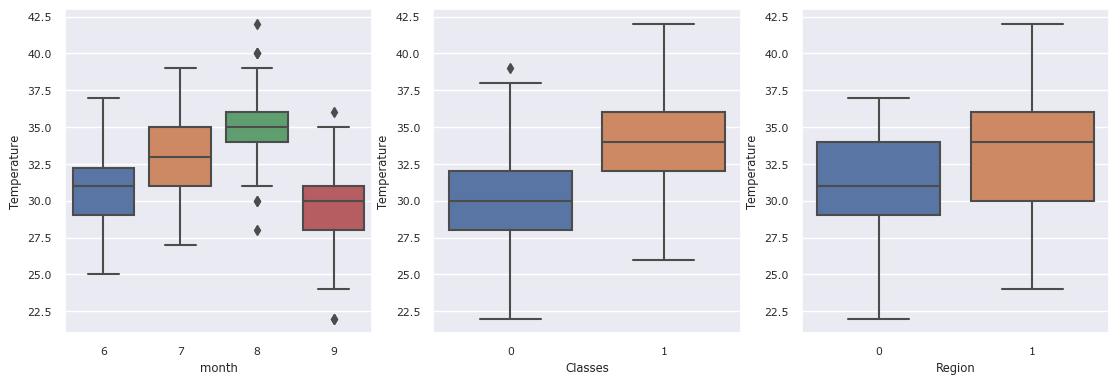

In [55]:
plt.figure(figsize=(12,4))
for i,col in enumerate(cat_cols):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df, x=col, y='Temperature')

#### Observation

1. Month seems to have clear relationship with temperature
2. Classes and Region also seems to have relationship with temperature but they both looks to have similar affect. This suggest that Classes and Region might be related to each other. We should do a Chi-squared test on these two. It's done later
3. Some outliers that I see here seems to be important. Let's keep them and check outliers again after transformation (Ideally, outliers should be removed before transformation)

### Linear Correlation between independent numerical features


#### Pearson Correlation

In [56]:
num_cols_ind_corr = df[num_cols_ind].corr()

In [57]:
print(num_cols_ind_corr.values.max())
print(num_cols_ind_corr.values.min())
print("no need to worry about negative correlation because max negative correlation is less than 0.85")


1.0
-0.6866670434377354
no need to worry about negative correlation because max negative correlation is less than 0.85


<AxesSubplot:>

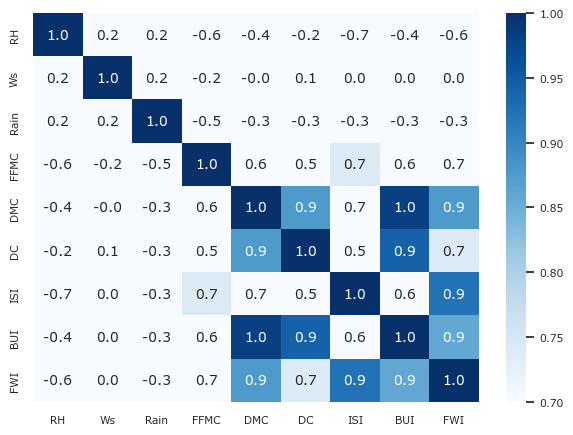

In [58]:
sns.heatmap(num_cols_ind_corr, vmin= 0.7, cmap="Blues", annot=True, fmt='0.1f', annot_kws={'size':10})

##### Observation based on Pearson Correlation

My threshold for high correlation is 0.85 <br>

Observations based on plots below: <br>
1. DC and DMC are highly correlated --> 0.9
2. BUI and DMC are highly correlated --> 1.0
3. FWI and DMC are highly correlated --> 0.9
4. BUI and DC are highly correlated --> 0.9
5. FWI and ISI are highly correlated --> 0.9
6. FWI and BUI are highly correlated --> 0.9

Ideally, we should check which amongst the two correlated feature is less correlated with the output feature. We can choose that one to drop. <br>
But the difference is usually very small because the two independent numerical features are highly correlated in the first place <br>

Based on first 3 observations, we can drop DC, BUI, FWI columns and just keep DMC <br>
Coming on last 3 observations, we now only have ISI column left because others are dropped as stated above.


In [59]:
df.drop(labels=["DC", "BUI", "FWI"], axis=1, inplace=True)

num_cols_ind = []
for col in df.columns:
    if col not in cat_cols and col != 'Temperature':
        num_cols_ind.append(col)

num_cols_ind

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI']

In [60]:
df.columns

Index(['month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI',
       'Classes', 'Region'],
      dtype='object')

<AxesSubplot:>

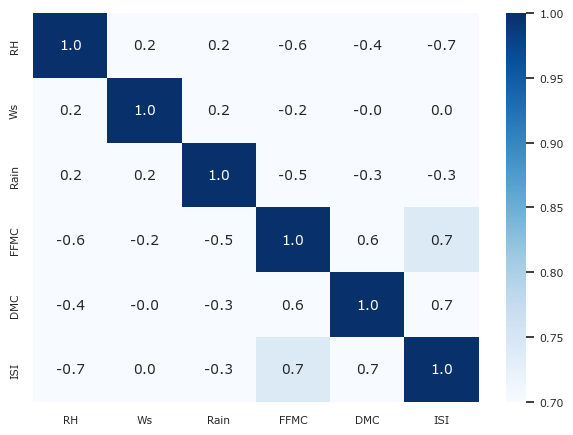

In [61]:
num_cols_ind_corr = df[num_cols_ind].corr()
sns.heatmap(num_cols_ind_corr, vmin= 0.7, cmap="Blues", annot=True, fmt='0.1f', annot_kws={'size':10})

#### VIF Score

https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html


In [62]:
df_vif = pd.DataFrame()
df_vif["VIF"] = [variance_inflation_factor(df[num_cols_ind],i) for i in range(len(num_cols_ind))]
df_vif["Features"] = df[num_cols_ind].columns

In [63]:
df_vif

,VIF,Features
0,28.078996,RH
1,34.225355,Ws
2,1.455443,Rain
3,31.607969,FFMC
4,4.655771,DMC
5,8.445229,ISI


In [64]:
df_desc.loc["FFMC"]

'Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5'

##### Observation based on VIF score -> run 1

1. All numerical features except rain have heavy multicollinearity
2. In general, value above 5 is considered to have significant multicollinearity
3. (n-1) of these features either should be combined or should be dropped
4. RH, Ws and FFMC have multicollinearity in double digits. Let's focus on these first. But these features are important intuitively. Hence, instead of dropping these features, let's combine 2 of them
5. From those 3, FFMC is the most important feature (based on Pearson's correlation and MI calculated with temperature). Let's combine RH and Ws with division operator (RH/Ws -> given that Ws != 0)

In [65]:
print(df["RH"].max())
print(df["RH"].min())
print(df["Ws"].max())
print(df["Ws"].min())

90
21
29
6


In [66]:
df["RH_by_Ws"] = df["RH"] / df["Ws"]

df.drop(labels=["RH", "Ws"], axis=1, inplace=True)

num_cols_ind = []
for col in df.columns:
    if col not in cat_cols and col != 'Temperature':
        num_cols_ind.append(col)

num_cols_ind

['Rain', 'FFMC', 'DMC', 'ISI', 'RH_by_Ws']

In [67]:
df_vif = pd.DataFrame()
df_vif["VIF"] = [variance_inflation_factor(df[num_cols_ind],i) for i in range(len(num_cols_ind))]
df_vif["Features"] = df[num_cols_ind].columns

df_vif

,VIF,Features
0,1.238383,Rain
1,28.216979,FFMC
2,4.623052,DMC
3,7.926321,ISI
4,14.715568,RH_by_Ws


<AxesSubplot:xlabel='RH_by_Ws', ylabel='Temperature'>

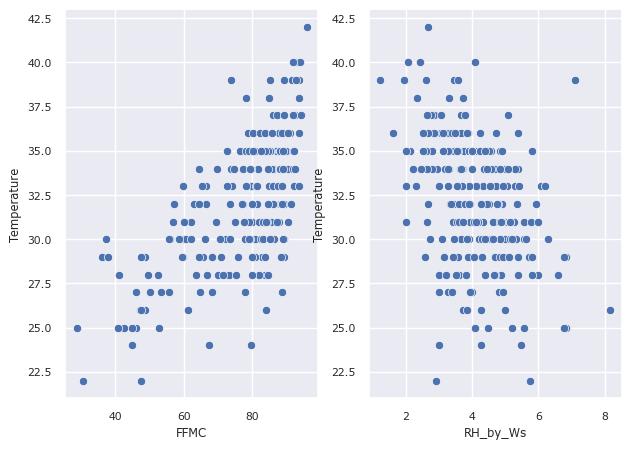

In [68]:
plt.subplot(1,2,1)
sns.scatterplot(data=df, x="FFMC", y="Temperature")

plt.subplot(1,2,2)
sns.scatterplot(data=df, x="RH_by_Ws", y="Temperature")

##### Observation based on VIF score -> run 2

1. I am not comfortable with removing either FFMC or RH_by_Ws
2. Intuitively, these features should affect temperature
3. Let's combine all these in some way
4. RH_by_Ws values seems to be around 1 to 8 approximately. Let's add them to FFMC to make a new feature combining RH, Ws and FFMC


In [69]:
df["RH_by_Ws_plus_FFMC"] = df["RH_by_Ws"] + df["FFMC"]

df.drop(labels=["RH_by_Ws", "FFMC"], axis=1, inplace=True)

num_cols_ind = []
for col in df.columns:
    if col not in cat_cols and col != 'Temperature':
        num_cols_ind.append(col)

num_cols_ind

['Rain', 'DMC', 'ISI', 'RH_by_Ws_plus_FFMC']

In [70]:
df_vif = pd.DataFrame()
df_vif["VIF"] = [variance_inflation_factor(df[num_cols_ind],i) for i in range(len(num_cols_ind))]
df_vif["Features"] = df[num_cols_ind].columns

df_vif

,VIF,Features
0,1.182151,Rain
1,4.623051,DMC
2,4.907150,ISI
3,4.168534,RH_by_Ws_plus_FFMC


##### Observation based on VIF score -> run 3

1. All vif scores are below 5
2. Values between 3 to 5 are generally considered moderately correlated, but they are usually kept
3. Values above 5 should be removed
4. We will keep these features


### Skewness and Kurtosis

skewness and kurtosis resource: https://vivekrai1011.medium.com/skewness-and-kurtosis-in-machine-learning-c19f79e2d7a5

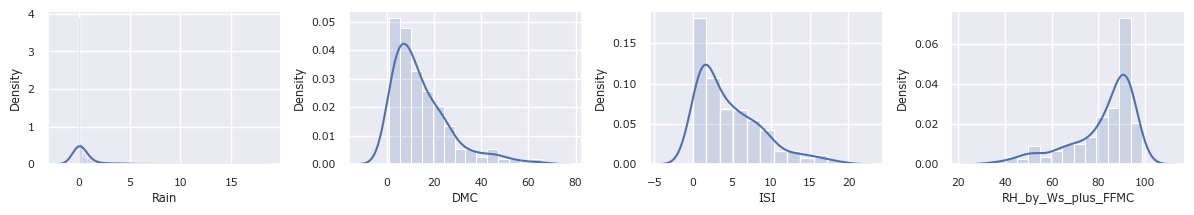

In [71]:
plt.figure(figsize=(12,8))
sns.set(font="Verdana", font_scale=0.7)
for i,col in enumerate(num_cols_ind):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, alpha = 0.2, stat='density', kde_kws=dict(cut=3))
plt.tight_layout()

In [72]:
def unidist_qqplot(df,num_cols_:list, skew_lst=[], kurt_lst=[]):
    '''
    This function gives univariate distribution and qqplot for numerical features
    Libraries required: matplotlib.pyplot as plt, seaborn as sns and scipy.stats as stats

    df: name of the dataframe
    num_cols_: list of numerical columns
    skew_lst: no need to provide anything, it's an empty list in which the skewness values will be appended
    kurt_lst: no need to provide anything, it's an empty list in which the kurtosis values will be appended
    '''
    for i,col in enumerate(num_cols_):
        
        f = plt.figure(figsize=(5,3))
        
        f.add_subplot(1,2,1)
        sns.histplot(df[col], kde=True, alpha = 0.2, stat='density', kde_kws=dict(cut=3))
        skew_ = df[col].skew()
        skew_lst.append(skew_)
        skew_str = 'skewness: %0.2f' % (skew_)

        kurt_ = df[col].kurt()
        kurt_lst.append(kurt_)
        kurt_str = 'kurtosis: %0.2f' % (kurt_)
        plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
        plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))


        f.add_subplot(1,2,2)
        stats.probplot(df[col], dist="norm", plot=plt)
        
        plt.show()
    return (f, skew_lst, kurt_lst)

# # plt.figure(figsize=(5,3))
# sns.set(rc={'figure.figsize':(5,3)})
# skew_lst = []
# kurt_lst = []

# for i,col in enumerate(num_cols_ind):
    
#     plt.subplot(1,2,1)
#     sns.histplot(df[col], kde=True, alpha = 0.2, stat='density', kde_kws=dict(cut=3))
#     skew_ = df[col].skew()
#     skew_lst.append(skew_)
#     skew_str = 'skewness: %0.2f' % (skew_)

#     kurt_ = df[col].kurt()
#     kurt_lst.append(kurt_)
#     kurt_str = 'kurtosis: %0.2f' % (kurt_)
#     plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
#     plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))


#     plt.subplot(1,2,2)
#     stats.probplot(df[col], dist="norm", plot=plt)
    
#     plt.show()




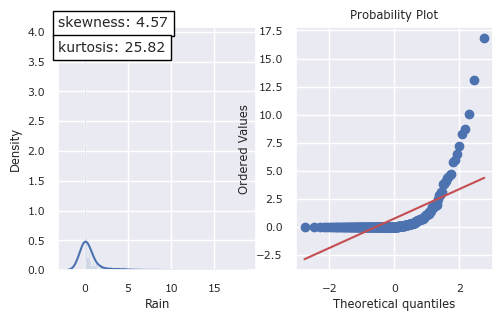

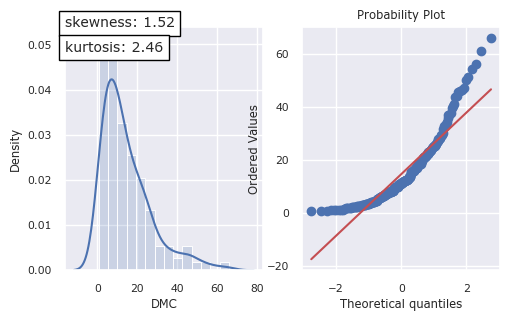

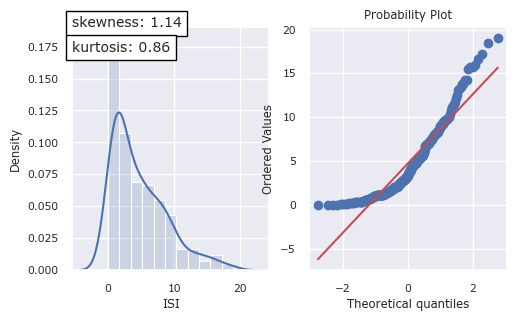

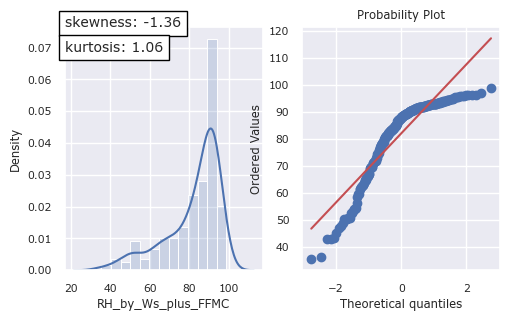

In [73]:
f,skew_lst,kurt_lst = unidist_qqplot(df=df,num_cols_=num_cols_ind)

In [74]:
skew_lst, kurt_lst

([4.5686298057295645,
  1.5229829314616827,
  1.1402425645672238,
  -1.356894351749938],
 [25.822986667377588,
  2.462550971040134,
  0.8623252199579228,
  1.0609690469386894])

In [75]:
df_normdist = pd.DataFrame({'col':num_cols_ind,
'skewness':skew_lst,
'kurtosis':kurt_lst})

In [76]:
df_normdist

,col,skewness,kurtosis
0,Rain,4.568630,25.822987
1,DMC,1.522983,2.462551
2,ISI,1.140243,0.862325
3,RH_by_Ws_plus_FFMC,-1.356894,1.060969


In [77]:
# print(df_normdist["skewness"].max())
# print(df_normdist["skewness"].min())
# print(df_normdist["kurtosis"].max())
# print(df_normdist["kurtosis"].min())

In [78]:
df.columns

Index(['month', 'Temperature', 'Rain', 'DMC', 'ISI', 'Classes', 'Region',
       'RH_by_Ws_plus_FFMC'],
      dtype='object')

In [79]:
# filter columns with: -0.5<skewness<+0.5 and -3<kurtosis<+3
filter1 = ((df_normdist["skewness"] >= -0.5) & (df_normdist["skewness"] <= 0.5))
filter2 = ((df_normdist["kurtosis"] >= -3.0) & (df_normdist["kurtosis"] <= 3.0))
print(df_normdist.loc[~filter1])
print("*"*30)
print(df_normdist.loc[~filter2])

                  col  skewness   kurtosis
0                Rain  4.568630  25.822987
1                 DMC  1.522983   2.462551
2                 ISI  1.140243   0.862325
3  RH_by_Ws_plus_FFMC -1.356894   1.060969
******************************
    col  skewness   kurtosis
0  Rain   4.56863  25.822987


#### Observation

1. All of them have high skewnesss
2. Rain column has very high kurtosis too. But Rain data is weird, it will need some special attention
3. All features need feature transformation

### Relationship between categorical features (Chi-squared test)

Null hypothesis ($H_0$): <br>
Classes and Regions have no relationship <br>

Alternate hypothesis ($H_1$): <br>
Classes and Regions have relationship

<AxesSubplot:xlabel='Classes', ylabel='count'>

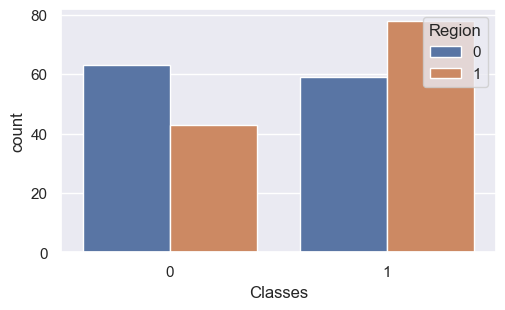

In [80]:
sns.set(rc={'figure.figsize':(5,3)})
sns.countplot(data=df, x="Classes", hue="Region")

In [81]:
pd.crosstab(index=df["Classes"], columns=df["Region"], margins=True)

Region,0,1,All
Classes,,,
0,63,43,106
1,59,78,137
All,122,121,243


In [82]:
df_classes_region = pd.crosstab(index=df["Classes"], columns=df["Region"], margins=False)
df_classes_region # we have to put margins = False to correctly calculate no. of rows and columns for dof

Region,0,1
Classes,,
0,63,43
1,59,78


In [83]:
observed_val = df_classes_region.values
observed_val

array([[63, 43],
       [59, 78]], dtype=int64)

In [84]:
# # chi square test of independence (based on Krish Naik sir's YT)
# val = stats.chi2_contingency(observed=observed_val, correction=True, lambda_=None)
# print("val: ", val)
# expected_val = val[3]
# print("expected_val: ", expected_val)
# no_of_rows=len(df_classes_region.index)
# no_of_columns=len(df_classes_region.columns)
# ddof=(no_of_rows-1)*(no_of_columns-1) # degree of freedom
# print("Degree of Freedom: ",ddof)
# alpha = 0.05
# print("alpha: ", alpha)
# chi_square=sum([(o-e)**2./e for o,e in zip(observed_val,expected_val)])
# chi_square_statistic=chi_square[0]+chi_square[1]
# print("chi-square statistic: ",chi_square_statistic)
# critical_value=stats.chi2.ppf(q=1-alpha,df=ddof)
# print('critical_value:',critical_value)

# if chi_square_statistic>=critical_value:
#     print("Reject H0,There is a relationship between 2 categorical variables")
# else:
#     print("Retain H0,There is no relationship between 2 categorical variables")

In [85]:
# OR simply do this, scipy.stats.chi2_contingency() return all the required values
# chi square test of independence (based on Krish Naik sir's YT)
chi2_val, p_val, dof_val, expected_val = stats.chi2_contingency(observed=observed_val, correction=True, lambda_=None)
print("chi square statistic: ", chi2_val)
print("p value: ", p_val)
print("degree of freedom: ", dof_val)
print("expected values: ", expected_val)

alpha = 0.05
print("alpha: ", alpha)

critical_value=stats.chi2.ppf(q=1-alpha,df=dof_val)
print('critical_value:',critical_value)

# based on critical value (domain knowledge required to set the value of alpha to decide critical value)
print("based on critical value (domain knowledge required to set the value of alpha to calculate critical value)")
if chi2_val>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

# based on p-value (domain knowledge required to set the value of alpha to compare with p value)
print("based on p-value (domain knowledge required to set the value of alpha)")
if p_val<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

chi square statistic:  5.766606312654941
p value:  0.016333547311115824
degree of freedom:  1
expected values:  [[53.218107 52.781893]
 [68.781893 68.218107]]
alpha:  0.05
critical_value: 3.841458820694124
based on critical value (domain knowledge required to set the value of alpha to calculate critical value)
Reject H0,There is a relationship between 2 categorical variables
based on p-value (domain knowledge required to set the value of alpha)
Reject H0,There is a relationship between 2 categorical variables


#### Observation
1. Classes and region are dependent, but I don't know how to determine the strength of the relationship
2. If we had a classification problem, we could have tested categorical relationship with target categorical variable and remove which had no relationship. But here we are checking between 2 categorical features (not target)
3. I am intuitively removing 'region' column because the physical parameters will decide the temperature, region has no meaning in its prediction
4. Also removing 'Classes' column as a test guess. Coming back here after seeing that adjusted R2 score is very low even after removing 'Region' column (it increased slightly so removing 'Region' column was right call)
5. Decision taken to drop 'Classes' column in step 4 was wrong, it decreased R2 and adjusted R2 score. We should keep 'Classes' column

In [86]:
df.drop(labels=["Region"], axis=1, inplace=True)

cat_cols = []
for col in df.columns:
    if col != 'Temperature':
        if col not in num_cols_ind and col != 'Region':
            cat_cols.append(col)

cat_cols

['month', 'Classes']

### Analysis/Preprocessing based on observations

Actions remaining:
1. Based on observations from Skewness and kurtosis
    1. Rain column is particularly terrible
    2. We need normal distribution on all columns (check corresponding observation markdown of skewness and kurtosis)

In [87]:
df.head()

,month,Temperature,Rain,DMC,ISI,Classes,RH_by_Ws_plus_FFMC
0,6,29,0.0,3.4,1.3,0,68.866667
1,6,29,1.3,4.1,1.0,0,69.092308
2,6,26,13.1,2.5,0.3,0,50.827273
3,6,25,2.5,1.3,0.0,0,35.446154
4,6,27,0.0,3.0,1.2,0,69.612500


In [88]:
temp = df["Temperature"]

In [89]:
df.drop(labels=["Temperature"], axis=1, inplace=True)
df["Temperature"] = temp
df.head()

,month,Rain,DMC,ISI,Classes,RH_by_Ws_plus_FFMC,Temperature
0,6,0.0,3.4,1.3,0,68.866667,29
1,6,1.3,4.1,1.0,0,69.092308,29
2,6,13.1,2.5,0.3,0,50.827273,26
3,6,2.5,1.3,0.0,0,35.446154,25
4,6,0.0,3.0,1.2,0,69.612500,27


#### Rain Column

In [90]:
df_desc.loc['Rain']

'total rain in mm: 0 to 16.8'

##### Standard Normal transformation

In [91]:
sns.set(rc={'figure.figsize':(5,3)})

0.0


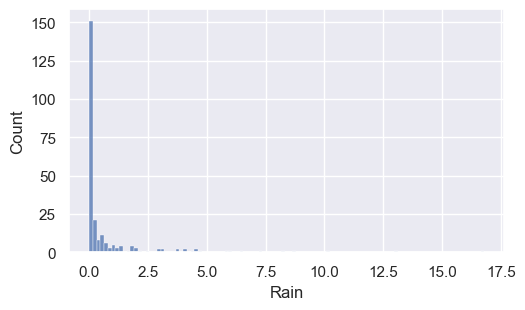

In [92]:
# Before doing log transformation, we should check if we have negative or 0 values
sns.histplot(data=df, x='Rain')
print(df['Rain'].min())

In [93]:
def toStdDist(x:pd.Series) -> pd.Series:
    '''
    Convert a pandas series to a standard normal distribution
    '''
    mu = x.mean()
    sigma = x.std()
    xx = (1/(np.sqrt(2*np.pi) * sigma)) * np.exp(-(0.5*((x-mu)/sigma)**2))

    return(xx)

In [94]:
rain_std = toStdDist(df['Rain'])

In [95]:
print(rain_std.skew())
print(rain_std.kurt())


-3.150608976124922
8.740343837325433


<AxesSubplot:xlabel='Rain', ylabel='Count'>

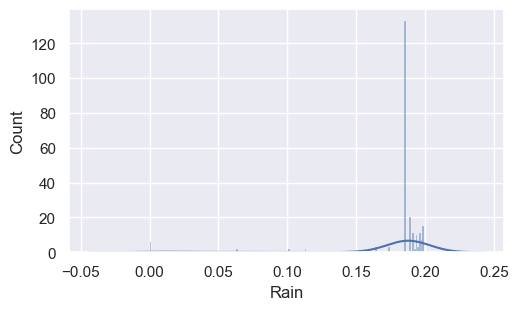

In [96]:
sns.histplot(rain_std, kde=True, kde_kws=dict(cut=3))

##### Log transformation

In [97]:
# add a small value if 'Rain'=0, actually there is an inbuilt function np.log1p() which add 1 to input array
# We can use np.log1p() in general
def add_small_value(data):
    if data==0:
        data += 1e-2
    else:
        data = data
    return data
log_rain = df['Rain'].apply(add_small_value)
log_rain.min()

0.01

skewness: 0.66
kurtosis: -1.05


<AxesSubplot:xlabel='Rain', ylabel='Density'>

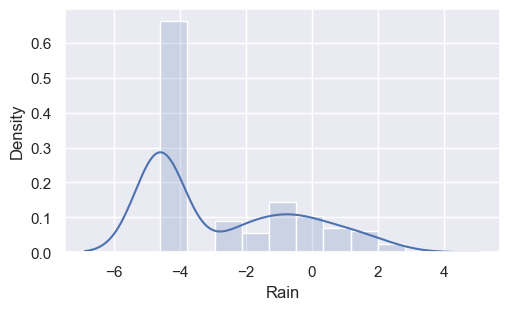

In [98]:
log_rain = np.log(log_rain)
print('skewness: %0.2f' % log_rain.skew())
print('kurtosis: %0.2f' % log_rain.kurt())
sns.histplot(data=log_rain, kde=True, alpha=0.2, kde_kws=dict(cut=3), stat='density')

##### Yeo Johnson transformation

In [99]:
# If lmbda is None, find the lambda that maximizes the log-likelihood function and return it as the second output argument.
# Otherwise the transformation is done for the given value.
yeo_rain,lmbda_val = stats.yeojohnson(x=df['Rain'], lmbda=None)
print(lmbda_val)


-2.3236708718105237


skewness: 0.82
kurtosis: -0.95


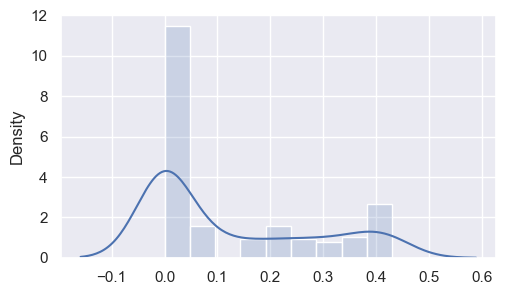

In [100]:
sns.histplot(data=yeo_rain, kde=True, alpha=0.2, kde_kws=dict(cut=3), stat='density')
print('skewness: %0.2f' % pd.Series(yeo_rain).skew())
print('kurtosis: %0.2f' % pd.Series(yeo_rain).kurt())

##### Sqrt transformation

In [101]:
rain_sqrt = np.sqrt(df['Rain'])

In [102]:
print('max', df['Rain'].max())
print('min', df['Rain'].min())

max 16.8
min 0.0


In [103]:
print('max', rain_sqrt.max())
print('min', rain_sqrt.min())


max 4.09878030638384
min 0.0


Text(0.0, 0.9, 'Kurtosis: 4.80')

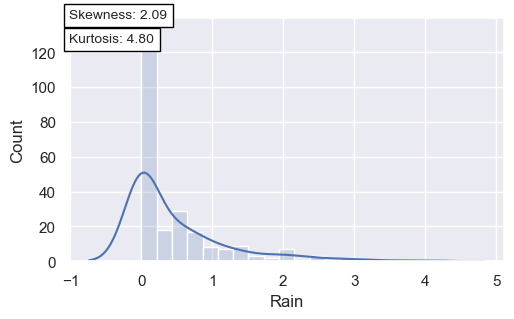

In [104]:
skew_ = rain_sqrt.skew()
kurt_ = rain_sqrt.kurt()

skew_str = 'Skewness: %0.2f' % skew_
kurt_str = 'Kurtosis: %0.2f' % kurt_

sns.histplot(data=rain_sqrt, kde=True, alpha=0.2, kde_kws=dict(cut=3), stat='count')
plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))

#### Yeo Johnson on all numerical featuers 

In [105]:
num_cols_ind

['Rain', 'DMC', 'ISI', 'RH_by_Ws_plus_FFMC']

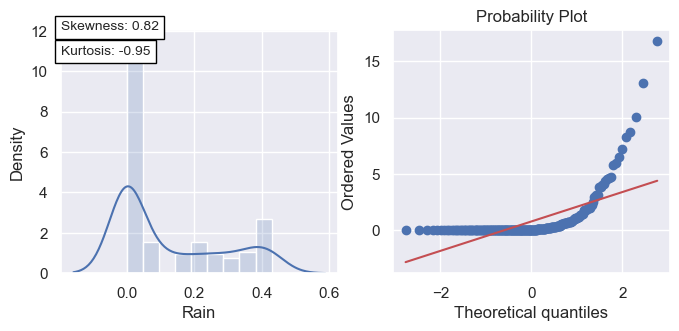

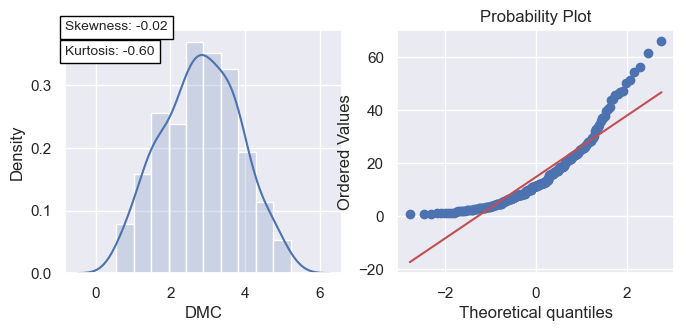

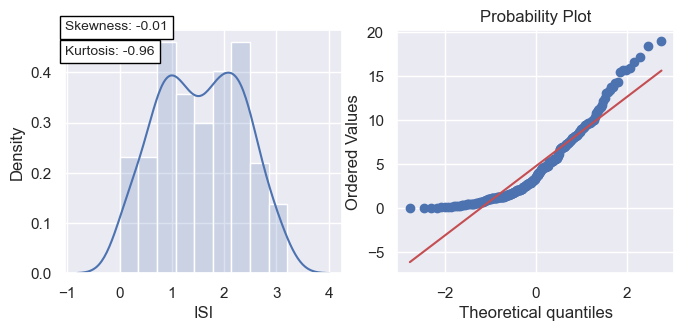

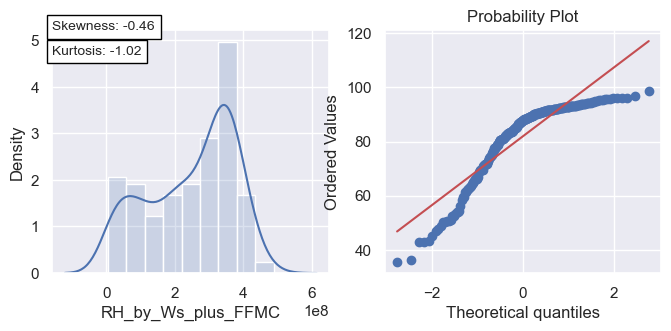

<Figure size 700x300 with 0 Axes>

In [106]:
#yeo_all = [] # we are plotting this data so no need to unnecessarily save it
lmbda_all = []
skew_all = []
kurt_all = []
sns.set(rc={'figure.figsize':(7,3)})
for i,col in enumerate(num_cols_ind):
    plt.subplot(1,2,1)

    yeo_data,lmbda_val= stats.yeojohnson(x=df[col], lmbda=None)
    #yeo_all.append(yeo_data)
    lmbda_all.append(lmbda_val)

    skew_ = pd.Series(yeo_data).skew()
    skew_all.append(skew_)

    kurt_ = pd.Series(yeo_data).kurt()
    kurt_all.append(kurt_)

    skew_str = 'Skewness: %0.2f' % skew_
    kurt_str = 'Kurtosis: %0.2f' % kurt_

    sns.histplot(data=yeo_data, kde=True, alpha=0.2, kde_kws=dict(cut=3), stat='density')
    
    plt.xlabel(col)
    plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
    plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.subplot(1,2,2)
    stats.probplot(df[col], dist="norm", plot=plt)

    plt.show()


plt.tight_layout()

##### Observation
1. Distribution is good but RH_by_Ws_plus_FFMC feature has value in the order 1e8
2. Check why this is happening

In [107]:
yeo_val_check, yeo_lambda_check = stats.yeojohnson(df["RH_by_Ws_plus_FFMC"], lmbda=None)

In [108]:
yeo_lambda_check

4.683290813571614

In [109]:
print(df["RH_by_Ws_plus_FFMC"].max())
print(df["RH_by_Ws_plus_FFMC"].min())
print("all positive")

98.66666666666667
35.44615384615385
all positive


In [110]:
print(yeo_val_check.max())
print(yeo_val_check.min())

488921817.7687713
4396609.885562025


In [111]:
# y = ((x + 1)**lmbda - 1) / lmbda,                for x >= 0, lmbda != 0
#     log(x + 1),                                  for x >= 0, lmbda = 0
#     -((-x + 1)**(2 - lmbda) - 1) / (2 - lmbda),  for x < 0, lmbda != 2
#     -log(-x + 1),                                for x < 0, lmbda = 2

##### Observation

1. Yeo Johnson is ideal, the issue of 1e8 scale in RH_by_Ws_plus_FFMC can be solved by standardization
2. But we will also check other transformations to be sure
3. By default, power transformer has stadard=True
4. I will check the plots again for scale after transformation

### YeoJohnson, Standard Normal, log and sqrt transformation on all numerical features 

In [112]:
len(num_cols_ind)

4

func:  <function yeojohnson at 0x0000017EF6DEDC60>


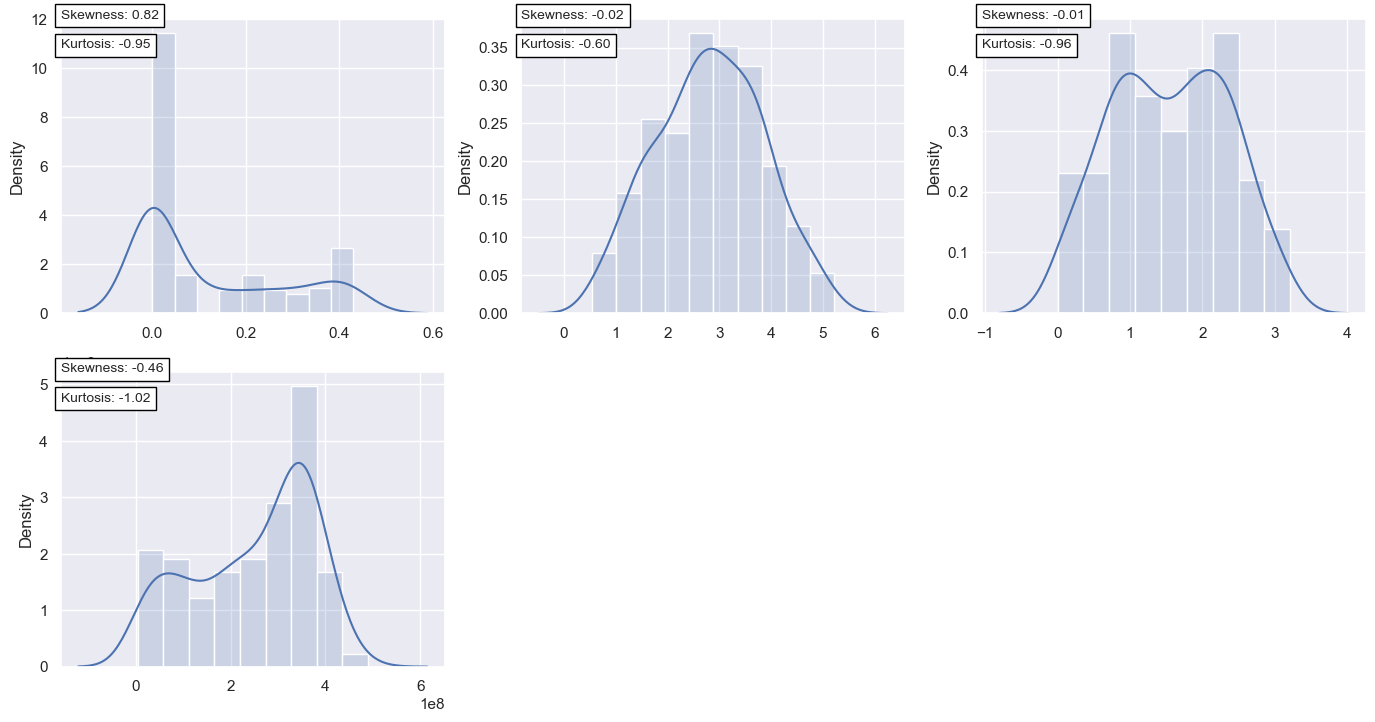

func:  <function toStdDist at 0x0000017EF7DFF9A0>


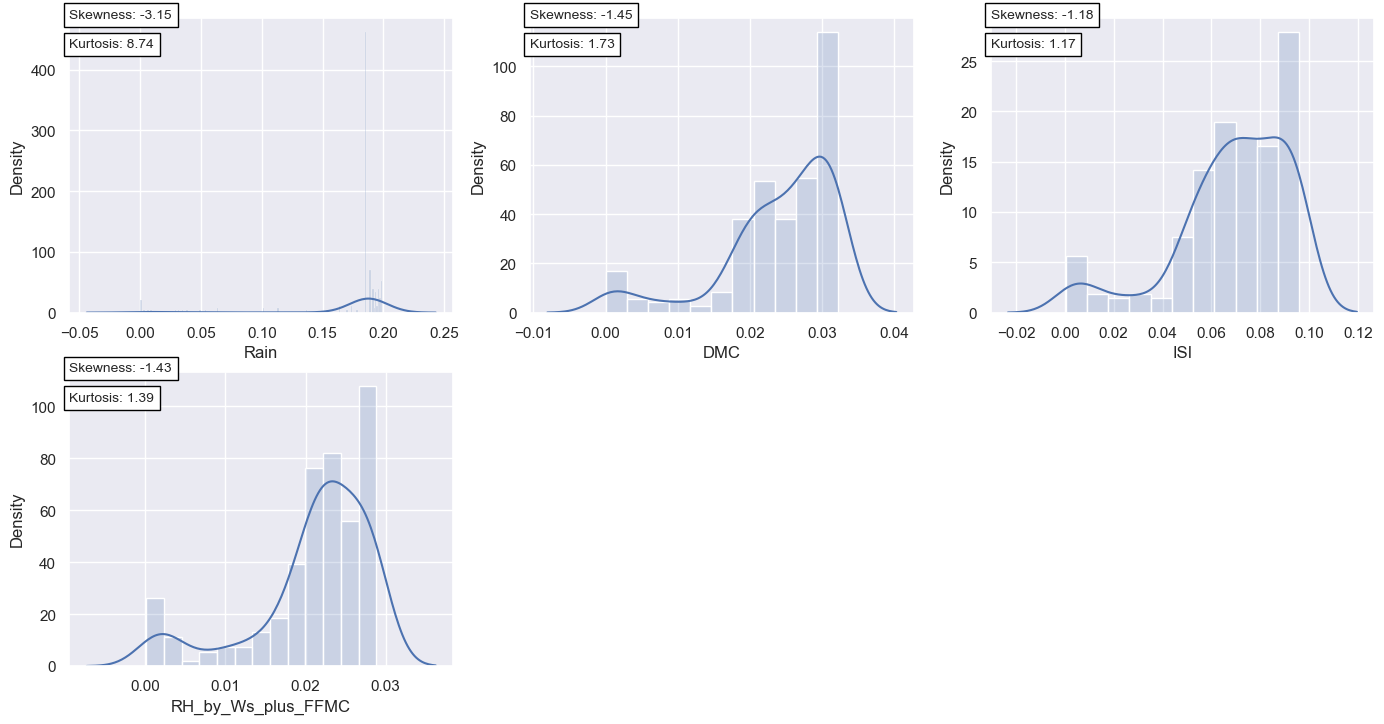

func:  <ufunc 'log1p'>


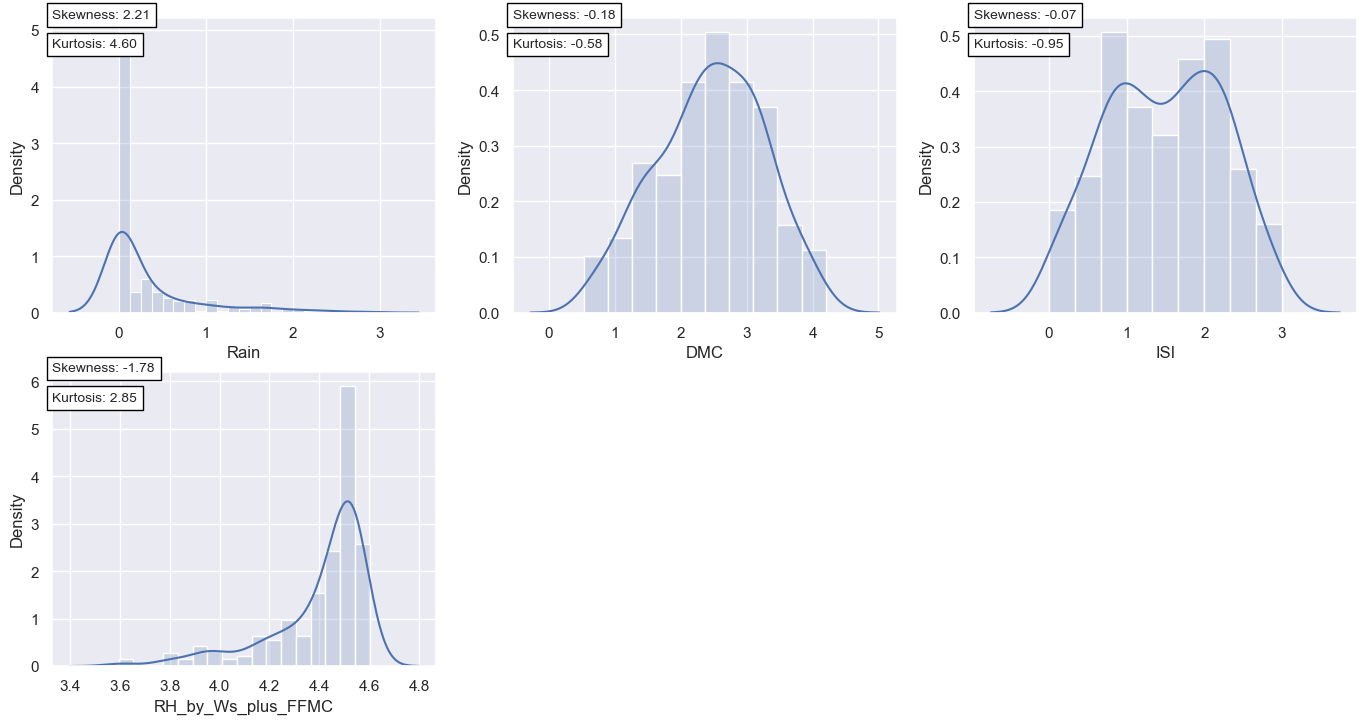

func:  <ufunc 'sqrt'>


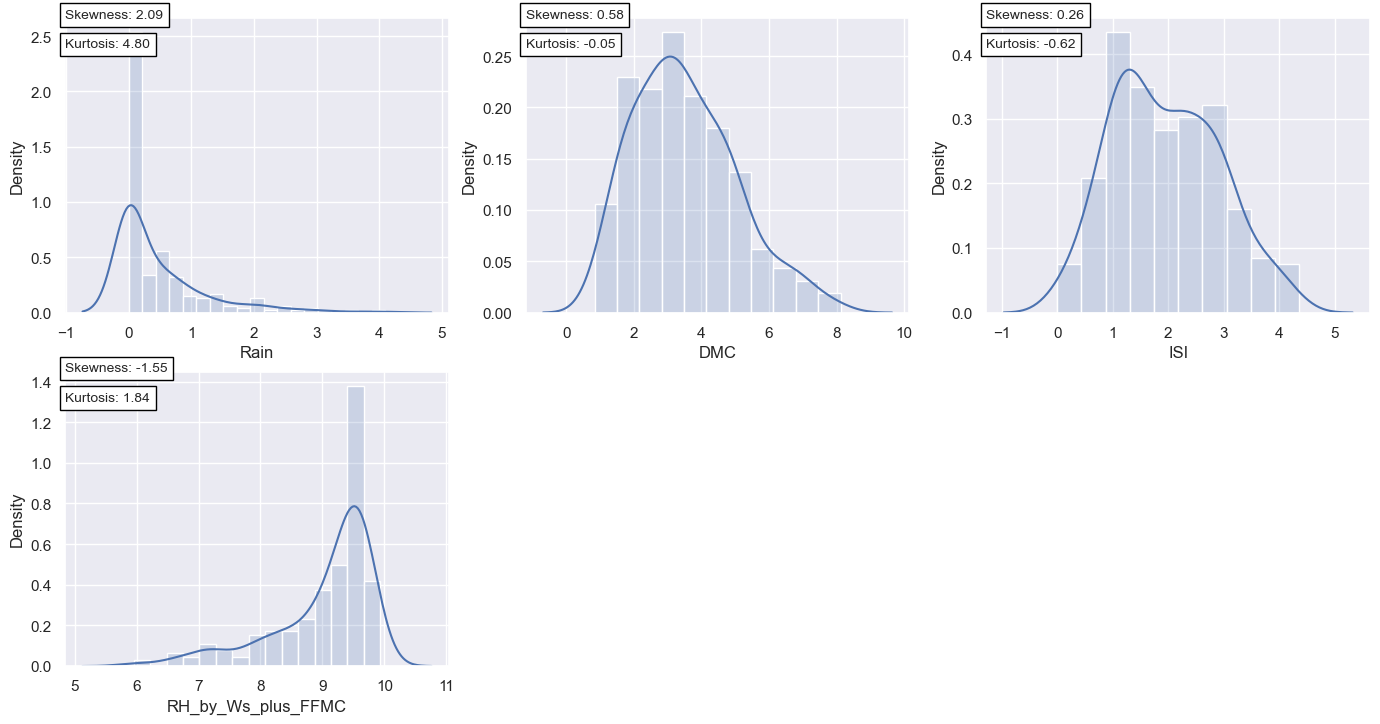

<Figure size 1500x800 with 0 Axes>

In [113]:
sns.set(rc={'figure.figsize':(15,8)})
# np.log1p adds 1 to the input array (this solves the issue of log(0))
for func in (stats.yeojohnson,toStdDist, np.log1p, np.sqrt):
    print('func: ', func)
    #lst_df = []
    for i,col in enumerate(num_cols_ind):
        plt.subplot(2,3,i+1)
        if func==stats.yeojohnson:
            col_std = func(df[col], lmbda=None)[0]
            col_std = pd.Series(col_std) # have to convert this in pandas object for skew() and kurt() methods to work
        else:
            col_std = func(df[col])

        #lst_df.append(np.array(col_std))
        skew_ = col_std.skew()
        kurt_ = col_std.kurt()
        skew_str = 'Skewness: %0.2f' % skew_
        kurt_str = 'Kurtosis: %0.2f' % kurt_
        sns.histplot(col_std, kde=True, alpha = 0.2, stat='density', kde_kws=dict(cut=3))
        plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
        plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
    
    plt.show()
    plt.tight_layout()

In [114]:
# sns.pairplot(pd.DataFrame(data=np.array(lst_df).T, columns=num_cols_ind), corner=True)

### Box plot on above transformations

c:\Users\bhavi\anaconda3\envs\ml\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


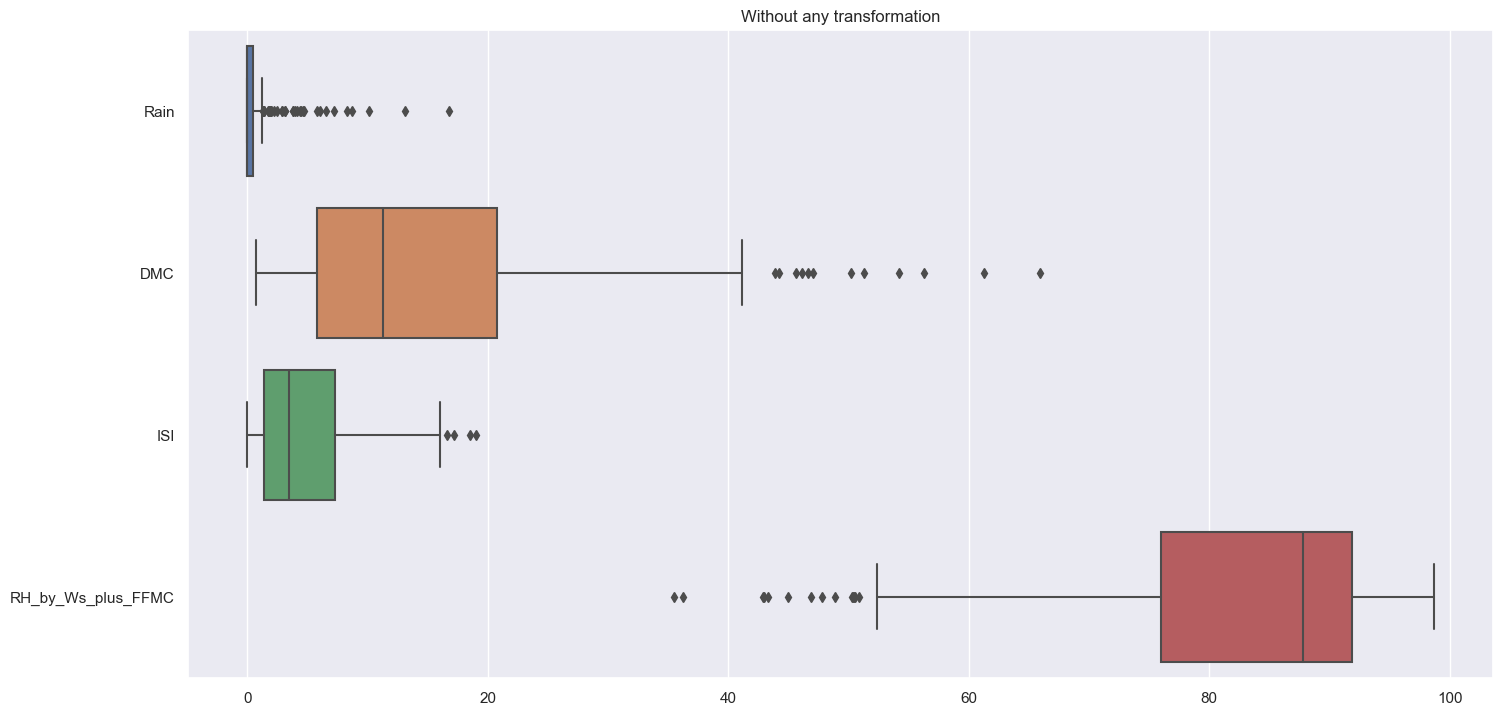

func:  <function yeojohnson at 0x0000017EF6DEDC60>


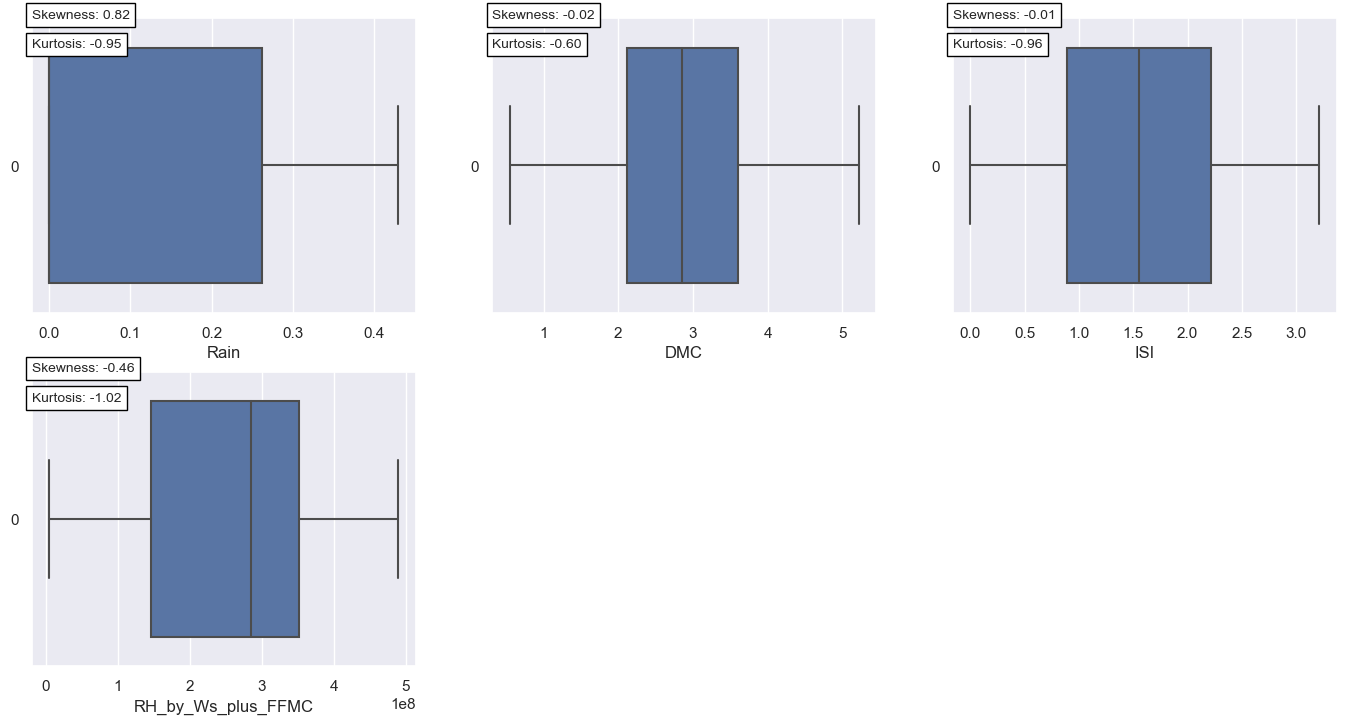

func:  <function toStdDist at 0x0000017EF7DFF9A0>


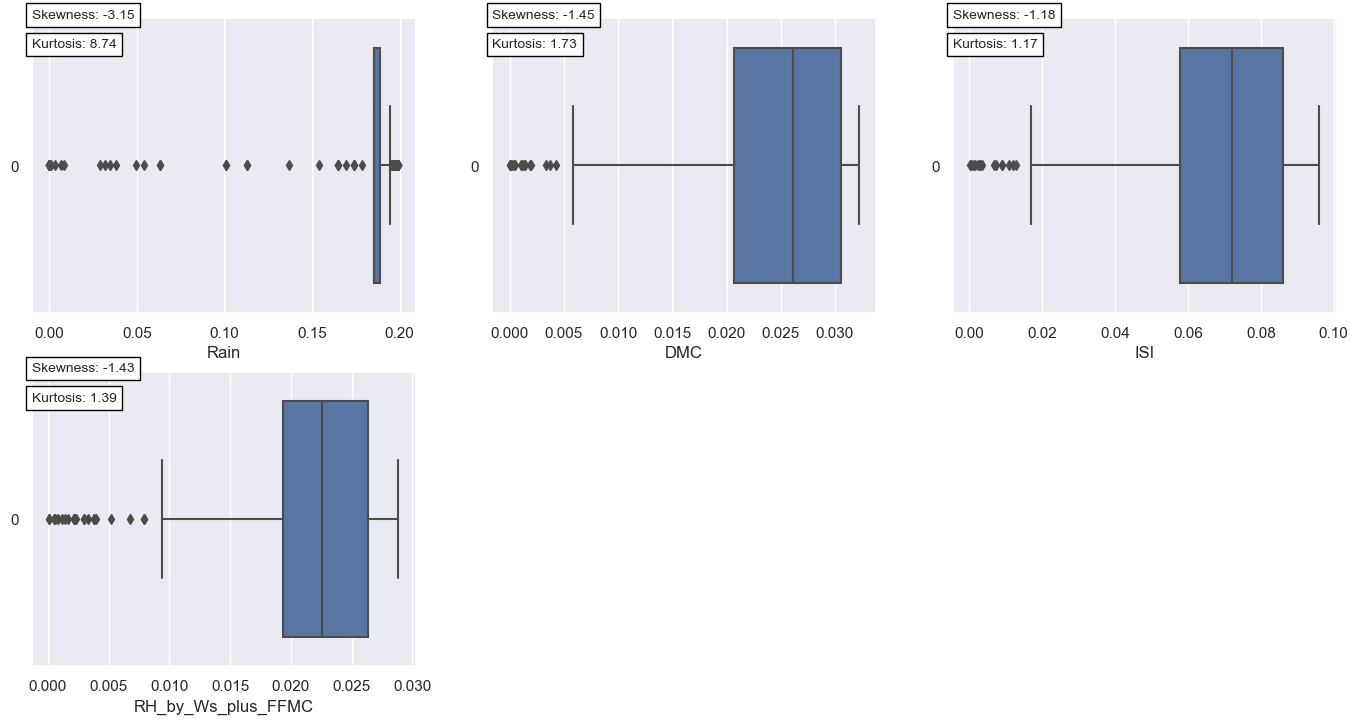

func:  <ufunc 'log1p'>


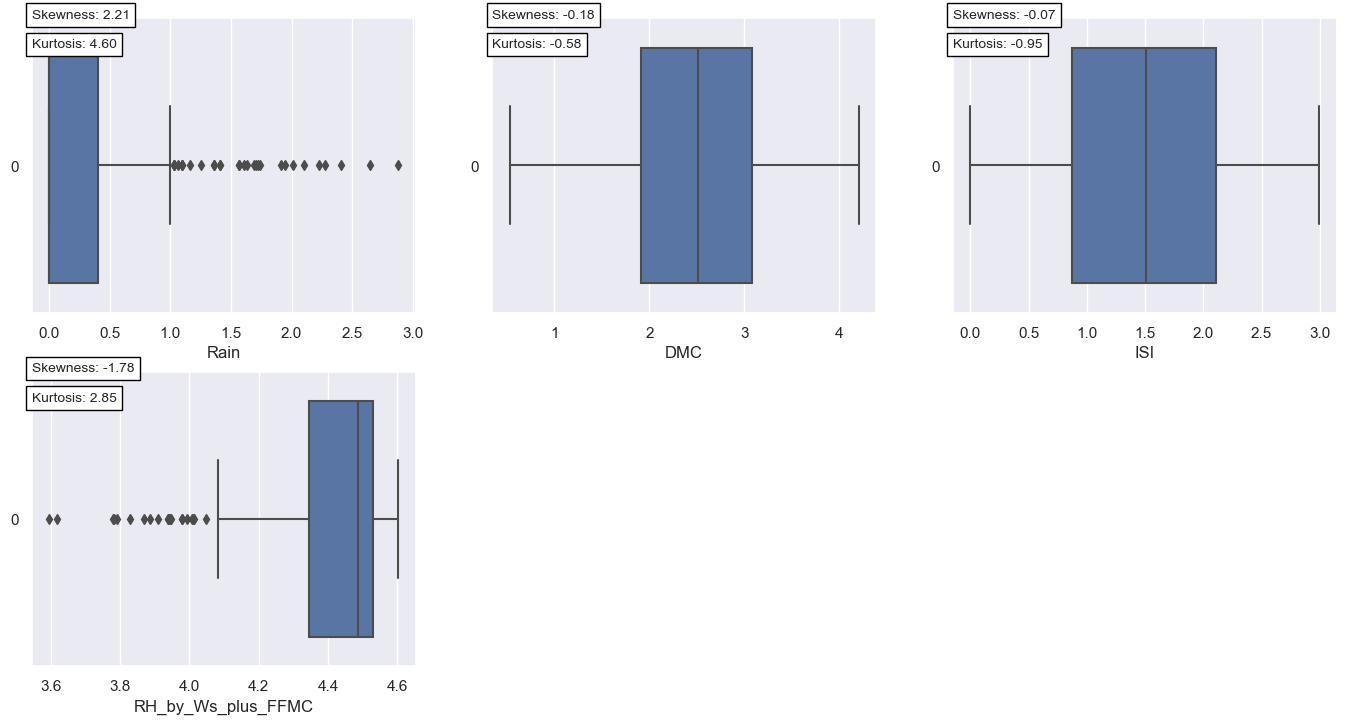

func:  <ufunc 'sqrt'>


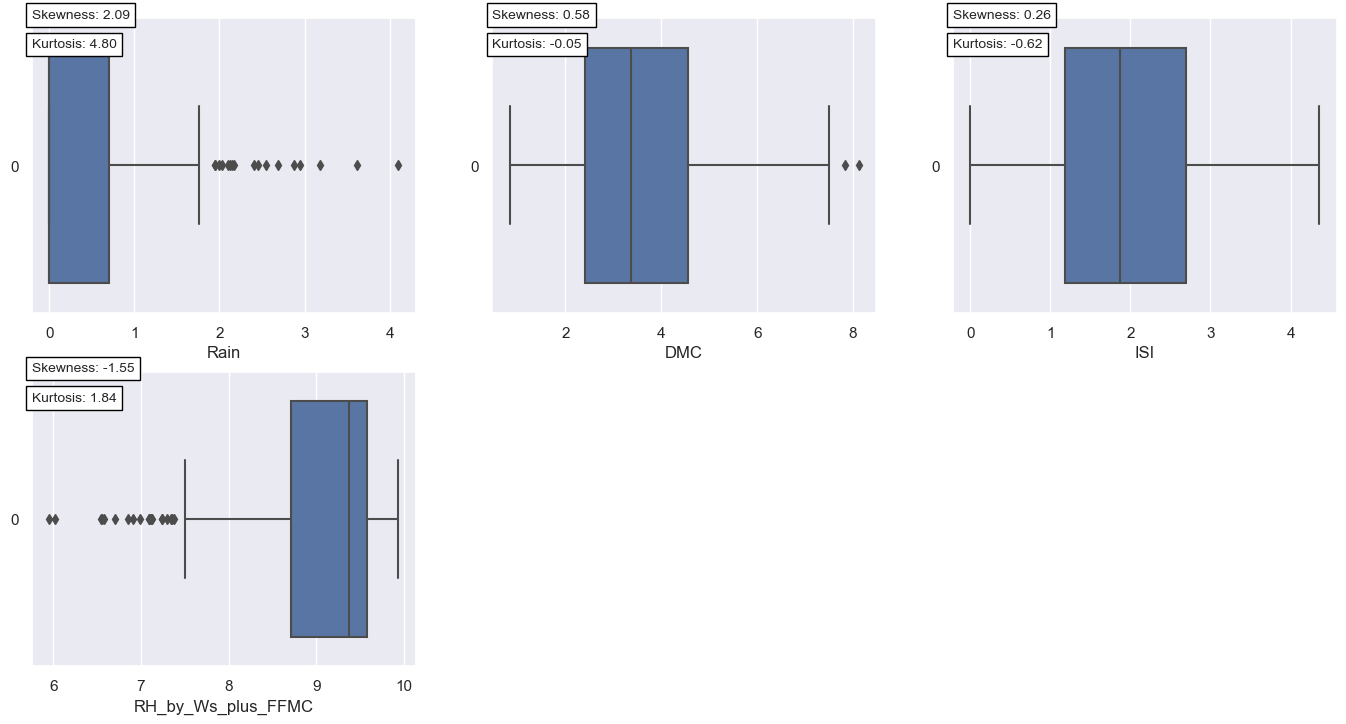

<Figure size 1500x800 with 0 Axes>

In [115]:
sns.set(rc={'figure.figsize':(15,8)})

# np.log1p adds 1 to the input array (this solves the issue of log(0))
sns.boxplot(df[num_cols_ind], orient="h")
plt.title('Without any transformation')
plt.show()
for func in (stats.yeojohnson,toStdDist, np.log1p, np.sqrt):
    print('func: ', func)
    for i,col in enumerate(num_cols_ind):
        plt.subplot(2,3,i+1)
        if func==stats.yeojohnson:
            col_std = func(df[col], lmbda=None)[0]
            col_std = pd.Series(col_std) # have to convert this in pandas object for skew() and kurt() methods to work
        else:
            col_std = func(df[col])
        skew_ = col_std.skew()
        kurt_ = col_std.kurt()
        skew_str = 'Skewness: %0.2f' % skew_
        kurt_str = 'Kurtosis: %0.2f' % kurt_
        sns.boxplot(col_std, orient="h")
        plt.xlabel(col)
        plt.text(0.0,1.0,skew_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))
        plt.text(0.0,0.9,kurt_str, fontsize=10, transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='black'))

    plt.show()
    plt.tight_layout()

## Conclusion
1. I will go with yeo johnson with argument stardard=True in sklearn.PowerTransformer()

## Outliers decision

1. After yeo johnson transformation with PowerTrasformer, they will be standardized due to the argument standard=True by default
2. I will check the outliers right after that
3. If outliers are present, I will deal with it

# Model

## Simple Linear Regression

In [116]:
df.columns

Index(['month', 'Rain', 'DMC', 'ISI', 'Classes', 'RH_by_Ws_plus_FFMC',
       'Temperature'],
      dtype='object')

### Train Test Split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels="Temperature", axis=1), df["Temperature"], test_size=0.33, random_state=42)

In [118]:
X_train.head(3)

,month,Rain,DMC,ISI,Classes,RH_by_Ws_plus_FFMC
229,9,0.0,12.6,4.3,1,90.000000
65,8,0.0,11.1,5.2,1,91.800000
171,7,0.0,23.9,5.2,1,90.633333


In [119]:
y_train.head(3)

229    28
65     34
171    33
Name: Temperature, dtype: int32

In [120]:
X_test.head(3)


,month,Rain,DMC,ISI,Classes,RH_by_Ws_plus_FFMC
24,6,0.0,14.2,5.7,1,90.966667
6,6,0.0,9.9,6.4,1,92.353846
154,7,2.2,3.2,1.2,0,66.922222


In [121]:
y_test.head(3)

24     31
6      33
154    28
Name: Temperature, dtype: int32

### Tranformers based on observations

In [122]:
[0,1,2,5,2,2,5,6,8][slice(1,4)]

[1, 2, 5]

In [123]:
df.columns

Index(['month', 'Rain', 'DMC', 'ISI', 'Classes', 'RH_by_Ws_plus_FFMC',
       'Temperature'],
      dtype='object')

In [124]:
# standardize is true by default in PowerTransformer
# trf = ColumnTransformer(
#     [("yeoJohnson",PowerTransformer(method="yeo-johnson"),slice(1,4)),
#     ("sqrt",FunctionTransformer(np.sqrt, feature_names_out="one-to-one"),[6]),
#     ],remainder='passthrough')

trf = ColumnTransformer(
    [("yeoJohnson",PowerTransformer(method="yeo-johnson"),slice(1,4)),
    ("yeoJohnson1",PowerTransformer(method="yeo-johnson"),[5]),
    ],remainder='passthrough')

# After dropping 'Classes'
# trf = ColumnTransformer(
#     [("yeoJohnson",PowerTransformer(method="yeo-johnson"),slice(1,5)),
#     ],remainder='passthrough')


# sklearn doc: The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list
# this means that order of the columns changes after column transformer. This makes it hard to build dataframe for the transformed numpy data
# FunctionTransformer must have feature_names_out = "one-to-one" for it to work, because by default it is None

In [125]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('yeoJohnson', PowerTransformer(),
                                 slice(1, 4, None)),
                                ('yeoJohnson1', PowerTransformer(), [5])])

In [126]:
X_train.sample(3)

,month,Rain,DMC,ISI,Classes,RH_by_Ws_plus_FFMC
191,8,2.9,7.2,1.2,0,74.546154
176,7,0.0,46.6,6.9,1,91.476471
99,9,0.9,2.6,1.1,0,66.294118


In [127]:
X_train_trans = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

In [128]:
# column names are wrongly ordered
# sklearn doc: The order of the columns in the transformed feature matrix follows the order of how the columns are specified in the transformers list
df_trans = pd.DataFrame(data=X_train_trans, columns=trf.get_feature_names_out())
df_trans.sample(3)


,yeoJohnson__Rain,yeoJohnson__DMC,yeoJohnson__ISI,yeoJohnson1__RH_by_Ws_plus_FFMC,remainder__month,remainder__Classes
35,-0.763662,1.754860,0.779174,0.773530,7.0,1.0
55,1.875313,-0.940825,-1.044842,-1.159729,6.0,0.0
69,1.861280,-1.361350,-1.348299,-1.506322,6.0,0.0


<AxesSubplot:xlabel='yeoJohnson1__RH_by_Ws_plus_FFMC', ylabel='Density'>

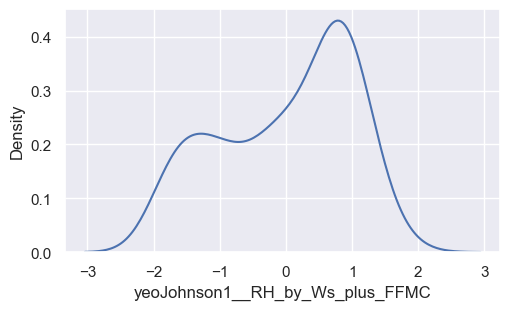

In [129]:
sns.set(rc={"figure.figsize":(5,3)})
sns.kdeplot(data=df_trans, x="yeoJohnson1__RH_by_Ws_plus_FFMC")

Ignore categorical columns
I have checked skewness and kurtosis before, this is just for checking scale


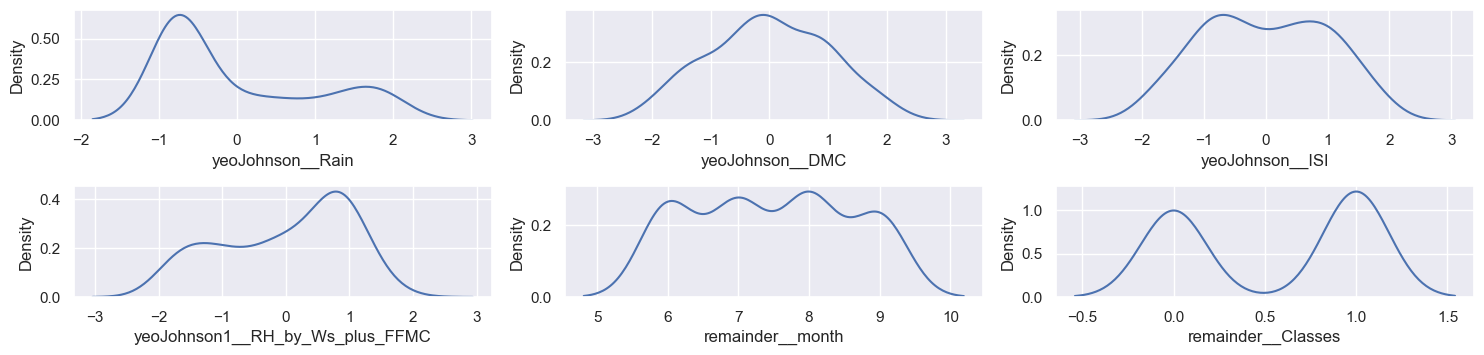

In [130]:
sns.set(rc={"figure.figsize":(15,5)})

for i,col in enumerate(df_trans.columns):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df_trans, x=col)

plt.tight_layout()
print("Ignore categorical columns")
print("I have checked skewness and kurtosis before, this is just for checking scale")

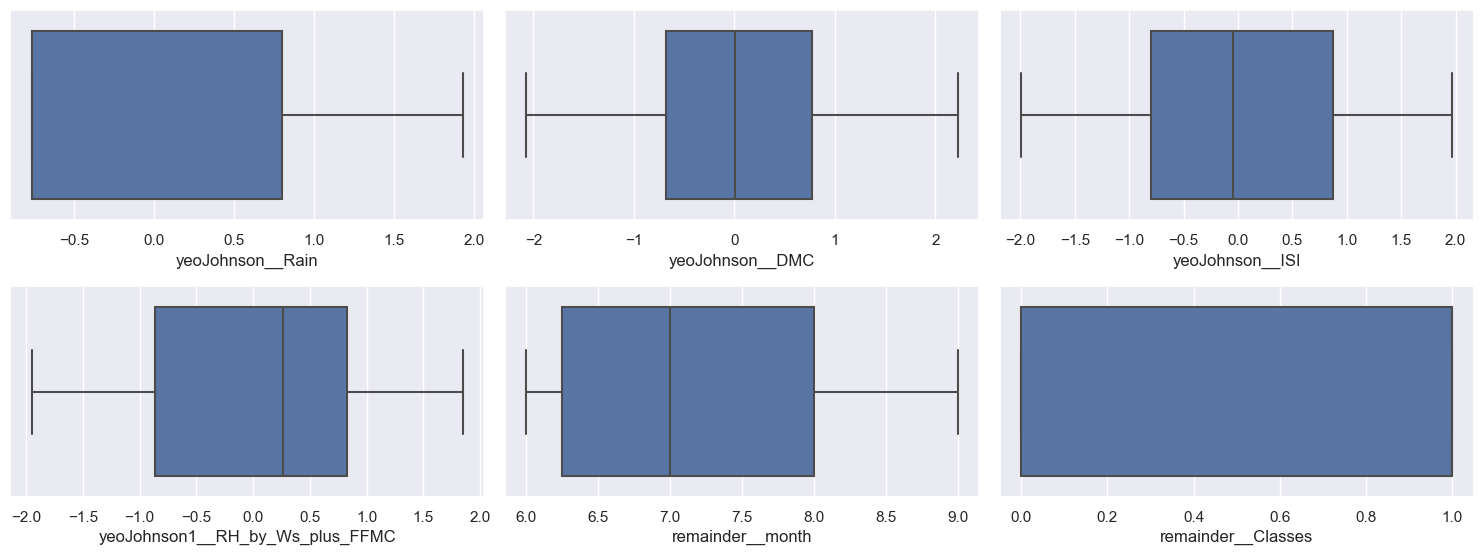

In [131]:
sns.set(rc={"figure.figsize":(15,8)})

for i,col in enumerate(df_trans.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df_trans, x=col)

plt.tight_layout()

### Outlier conclusion

No outliers present after yeo Johnson transformation follwed by standardization (due to argument standard=True by default)

In [132]:
df_trans.columns[:-3]

Index(['yeoJohnson__Rain', 'yeoJohnson__DMC', 'yeoJohnson__ISI'], dtype='object')

### Model

In [133]:
r2_all = {}
adj_r2_all = {}
rmse_all = {}
mae_all = {}

In [134]:
slr_reg_withoutTrf = LinearRegression()
slr_reg = LinearRegression()
slr_reg

LinearRegression()

In [135]:
slr_reg_withoutTrf.fit(X_train, y_train)
slr_reg.fit(X_train_trans, y_train)

LinearRegression()

In [136]:
print("With transformation")
print("Coef: ", slr_reg.coef_)
print("Intercept: ", slr_reg.intercept_)
print("Score: ", slr_reg.score(X_train_trans, y_train))
print("\n")
print("Without transformation")
print("Coef: ", slr_reg_withoutTrf.coef_)
print("Intercept: ", slr_reg_withoutTrf.intercept_)
print("Score: ", slr_reg_withoutTrf.score(X_train, y_train))


With transformation
Coef:  [ 1.76907297 -0.08261002  0.3905229   4.4869335  -0.02375108 -2.24205682]
Intercept:  33.50776613394426
Score:  0.5649044067424229


Without transformation
Coef:  [-0.01133535  0.14279172  0.0115294   0.22193674 -1.30228949  0.17278172]
Intercept:  17.419802684187736
Score:  0.4994969400970949


In [137]:
print("R2 with transformation: ",np.mean(cross_val_score(slr_reg,X_train_trans,y_train,scoring='r2',cv=10)))
print("R2 without transformation: ",np.mean(cross_val_score(slr_reg_withoutTrf,X_train,y_train,scoring='r2',cv=10)))

R2 with transformation:  0.4484185935605929
R2 without transformation:  0.3651076712721074


In [138]:
r2_all["simple_reg"]=(np.mean(cross_val_score(slr_reg,X_train_trans,y_train,scoring='r2',cv=10)))

In [139]:
def adj_r2(r2value: float, n: int, p: int) -> float:
    '''
    r2value: r2 score
    n: number of data points
    p: number of independent features
    '''
    adjr2 = 1 - (((1-r2value**2)*(n-1))/(n-p-1))
    return adjr2

In [140]:
adj_r2_all["simple_reg"] = adj_r2(r2_all["simple_reg"],df.shape[0],df.shape[1]-1)
adj_r2_all["simple_reg"]

0.18076769017927197

#### Observation
1. Without cross validation, we don't get an accurate estimate
2. With cross validation, we get to know that with transformation, the prediction is better. R2 score is very low though for both
3. But we should predict and check the metric to get a complete picture.
4. Low R2 score is probably due to the fact that the dataset is basically for a classification problem of predicting fire. I have forced it to for a regression problem to predict temperature
5. Very low adjusted R2 score than R2 score suggests overfitting

### Prediction and check for assumptions of linear regression

In [141]:
X_test_trans

array([[-0.76366154,  0.28027194,  0.56436202,  0.70721687,  6.        ,
         1.        ],
       [-0.76366154, -0.12360537,  0.69405338,  0.89058514,  6.        ,
         1.        ],
       [ 1.73576858, -1.22183428, -0.91584601, -1.28086621,  7.        ,
         0.        ],
       [ 0.14214554,  0.60307514, -0.45473567, -0.08609534,  9.        ,
         0.        ],
       [-0.76366154,  0.41873299,  0.30563726,  0.59017762,  9.        ,
         1.        ],
       [ 1.47426024,  0.06063909, -0.97876156, -0.36907725,  7.        ,
         0.        ],
       [-0.76366154, -0.94082513, -0.01918218,  0.2196103 ,  9.        ,
         1.        ],
       [ 0.99444511,  0.55100162,  0.37541147,  0.45911022,  6.        ,
         1.        ],
       [-0.76366154, -0.16831993, -0.8558097 , -0.46506684,  6.        ,
         0.        ],
       [ 0.99444511, -0.04885607, -0.33134362, -0.41044233,  9.        ,
         0.        ],
       [-0.76366154, -0.48939685, -1.26565333, -0.

In [142]:
y_pred = slr_reg.predict(X_test_trans)
y_pred_withoutTrf = slr_reg_withoutTrf.predict(X_test)

Text(0.5, 1.0, 'y_test-y_pred_withoutTrf')

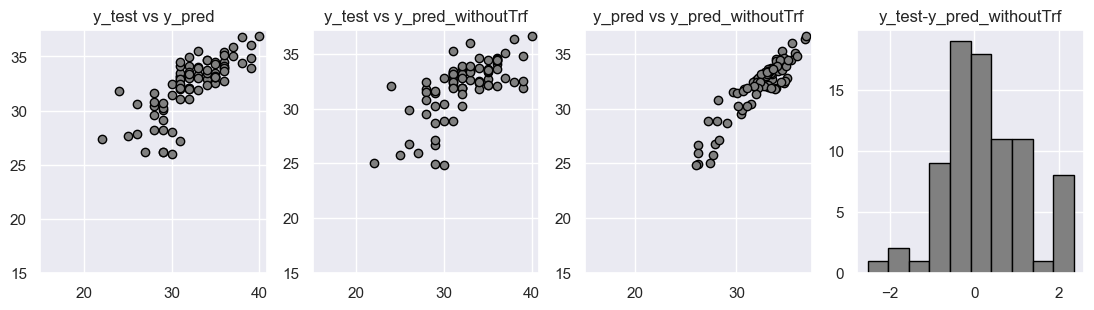

In [143]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.scatter(x=y_test, y=y_pred, color="grey", edgecolor="black")
plt.xlim(15,)
plt.ylim(15,)
plt.title("y_test vs y_pred")

plt.subplot(1,4,2)
plt.scatter(x=y_test, y=y_pred_withoutTrf, color="grey", edgecolor="black")
plt.xlim(15,)
plt.ylim(15,)
plt.title("y_test vs y_pred_withoutTrf")

plt.subplot(1,4,3)
plt.scatter(x=y_pred, y=y_pred_withoutTrf, color="grey", edgecolor="black")
plt.xlim(15,)
plt.ylim(15,)
plt.title("y_pred vs y_pred_withoutTrf")

plt.subplot(1,4,4)
plt.hist(x=y_pred-y_pred_withoutTrf, color="grey", edgecolor="black")
plt.title("y_test-y_pred_withoutTrf")

Residuals with Trf is better


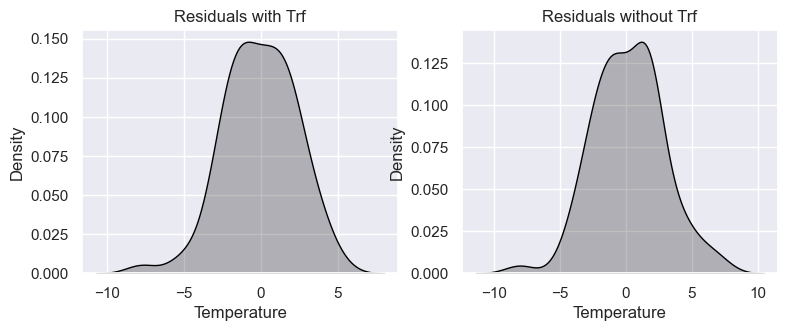

In [144]:
sns.set(rc={'figure.figsize':(8,3)})

plt.subplot(1,2,1)
sns.kdeplot(y_test-y_pred,color='black', lw=1, fill=True).set(title='Residuals with Trf')

plt.subplot(1,2,2)
sns.kdeplot(y_test-y_pred_withoutTrf,color='black', lw=1, fill=True).set(title='Residuals without Trf')

print("Residuals with Trf is better")

This is not a good sign. Residuals seems to be following a trend.


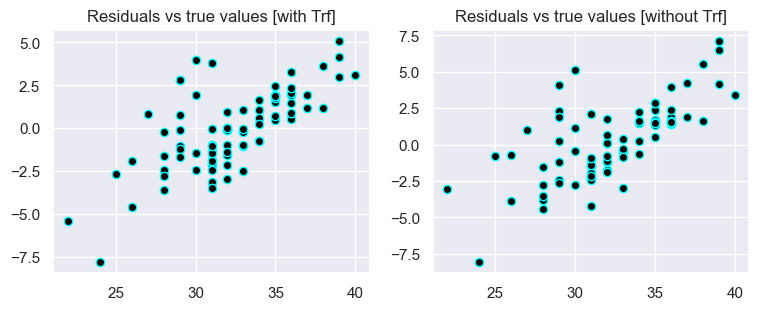

In [145]:
plt.subplot(1,2,1)
plt.scatter(y_test,y_test - y_pred, color='black', edgecolor='cyan')
plt.title("Residuals vs true values [with Trf]")

plt.subplot(1,2,2)
plt.scatter(y_test,y_test - y_pred_withoutTrf, color='black', edgecolor='cyan')
plt.title("Residuals vs true values [without Trf]")

print("This is not a good sign. Residuals seems to be following a trend.")


### Performance Metrics

With transformation results are slightly better based on the metrics shown below. Let's only process the data with transformation for further study

In [146]:
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE: ',mean_absolute_error(y_test, y_pred))

MSE:  5.3570676229202565
RMSE:  2.3145339969247063
MAE:  1.8632818998922562


In [147]:
print('MSE: ',mean_squared_error(y_test, y_pred_withoutTrf))
print('RMSE: ',np.sqrt(mean_squared_error(y_test, y_pred_withoutTrf)))
print('MAE: ',mean_absolute_error(y_test, y_pred_withoutTrf))

MSE:  6.977028892261567
RMSE:  2.64140661244375
MAE:  2.117242852656624


In [148]:
rmse_all["simple_reg"]=np.sqrt(mean_squared_error(y_test, y_pred))
mae_all["simple_reg"]=mean_absolute_error(y_test, y_pred)

## Ridge Linear Regression

### Model

In [149]:
alphas = np.random.uniform(0, 1, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = 10) # normalize is depreciated from now on
# it's weird that RidgeCV doesn not have random_state argument but LassoCV does
# alpha value changes over multiple function calls, should have some way to fix random state here
# anyway, I have checked that all the data has nearby scale so it's fine. We have transformed data too.
ridge_cv.fit(X_train_trans, y_train)

RidgeCV(alphas=array([0.32752858, 0.95206265, 0.01786768, 0.25503106, 0.54010334,
       0.20871762, 0.30687849, 0.63253131, 0.04780011, 0.75542424,
       0.30986294, 0.31815072, 0.66593004, 0.14888352, 0.28954751,
       0.47262914, 0.47063389, 0.92303722, 0.87095091, 0.39776378,
       0.81091188, 0.24326573, 0.2155074 , 0.19946834, 0.5392399 ,
       0.01516029, 0.54400217, 0.98293218, 0.05091405, 0.60961649,...
       0.65073202, 0.75677614, 0.03738716, 0.34209822, 0.62310228,
       0.46235403, 0.90605737, 0.80982857, 0.82028195, 0.48009971,
       0.80494536, 0.74827755, 0.95417841, 0.29479151, 0.84953416,
       0.67339288, 0.56776292, 0.15076372, 0.98940041, 0.70031116,
       0.92063749, 0.22454792, 0.9843744 , 0.72143668, 0.30549069,
       0.02015769, 0.59689203, 0.39478732, 0.635927  , 0.52547948,
       0.73517515, 0.83431082, 0.65830513, 0.50337405, 0.59123097]),
        cv=10)

In [150]:
alpha = ridge_cv.alpha_
alpha

0.461168531333493

In [151]:
ridge_reg = Ridge(alpha=alpha, random_state=42) # alpha is lambda, ie, tuning parameter
ridge_reg

Ridge(alpha=0.461168531333493, random_state=42)

In [152]:
ridge_reg.fit(X_train_trans, y_train)

Ridge(alpha=0.461168531333493, random_state=42)

In [153]:
print("Coef: ", ridge_reg.coef_)
print("Intercept: ", ridge_reg.intercept_)
print("Score: ", ridge_reg.score(X_train_trans, y_train))

Coef:  [ 1.71337003 -0.05410939  0.50785492  4.22613989 -0.02130781 -2.08109769]
Intercept:  33.401103916570484
Score:  0.5645872932212942


In [154]:
r2_crossval = np.mean(cross_val_score(ridge_reg,X_train_trans,y_train,scoring='r2',cv=10))
print("R2 with transformation: ",r2_crossval)

R2 with transformation:  0.4489573510026495


In [155]:
r2_all["ridge_reg"]=r2_crossval

In [156]:
r2_all

{'simple_reg': 0.4484185935605929, 'ridge_reg': 0.4489573510026495}

In [157]:
adj_r2_all["ridge_reg"] = adj_r2(r2_crossval, df.shape[0], df.shape[1]-1)
adj_r2_all["ridge_reg"]

0.18126344970624797

In [158]:
adj_r2_all

{'simple_reg': 0.18076769017927197, 'ridge_reg': 0.18126344970624797}

#### Observation
1. Slightly better R2 than simple linear regression
2. Adjusted R2 is still horrible
3. Very low adjusted R2 score than R2 score suggests overfitting

### Prediction and check for assumptions of linear regression

In [159]:
y_pred = ridge_reg.predict(X_test_trans)

Right side is not good. Residuals should not follow a trend


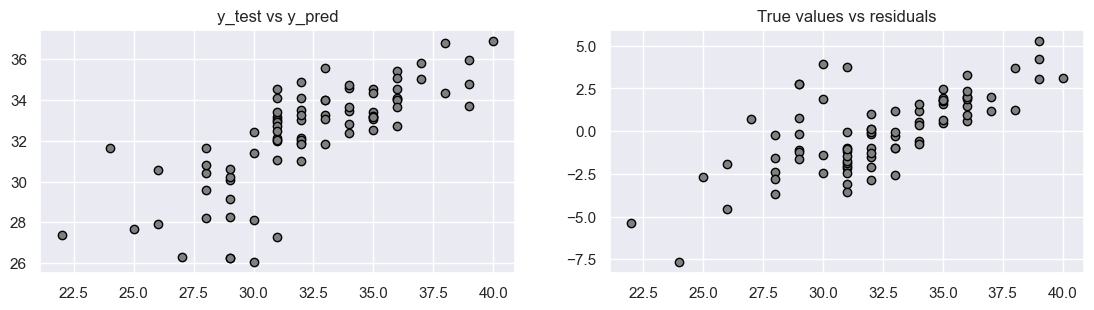

In [160]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(x=y_test, y=y_pred, color="grey", edgecolor="black")
plt.title("y_test vs y_pred")


plt.subplot(1,2,2)
plt.scatter(y_test,y_test-y_pred, color="grey", edgecolor="black")
plt.title("True values vs residuals")

print("Right side is not good. Residuals should not follow a trend")

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

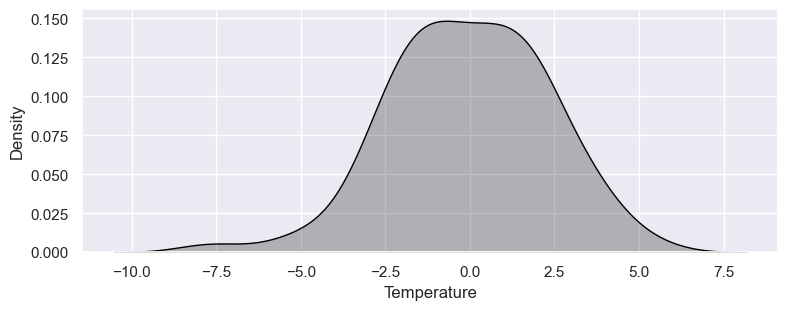

In [161]:
sns.set(rc={'figure.figsize':(8,3)})

sns.kdeplot(y_test-y_pred,color='black', lw=1, fill=True)

### Performance Metrics

In [162]:
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ = mean_absolute_error(y_test, y_pred)

print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',rmse_)
print('MAE: ',mae_)

rmse_all["ridge_reg"] = rmse_
mae_all["ridge_reg"] = mae_


MSE:  5.337055798604767
RMSE:  2.310206873551537
MAE:  1.860834931544205


In [163]:
rmse_all

{'simple_reg': 2.3145339969247063, 'ridge_reg': 2.310206873551537}

In [164]:
mae_all

{'simple_reg': 1.8632818998922562, 'ridge_reg': 1.860834931544205}

#### Observation

1. Slightly better than Simple Linear Regression
2. Very low adjusted R2 score than R2 score suggests overfitting

#### Manual $\lambda$ tuning for Ridge

Anyway we can get alpha from ridge_cv, let's try to learn it manually

In [165]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [166]:
mse_lst = []
rmse_lst = []
mae_lst = []
r2_lst = []
lambda_lst = []

for val in np.linspace(0,1,11):
    lambda_lst.append(val)
    
    ridge_reg = Ridge(alpha=val, random_state=0) # alpha is lambda, ie, tuning parameter
    ridge_reg.fit(X_train_trans, y_train)
    # print("Coef: ", ridge_reg.coef_)
    # print("Intercept: ", ridge_reg.intercept_)
    r2_score_ = np.mean(cross_val_score(ridge_reg,X_train_trans,y_train,scoring='r2',cv=10))
    r2_lst.append(r2_score_)

    y_pred = ridge_reg.predict(X_test_trans)
    mse_ = mean_squared_error(y_test, y_pred)
    mse_lst.append(mse_)
    rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_lst.append(rmse_)
    mae_ = mean_absolute_error(y_test, y_pred)
    mae_lst.append(mae_)

Note: The cost function for Ridge won't decrease with increasing lambda, it increases
Here we are just monitoring r2 and error


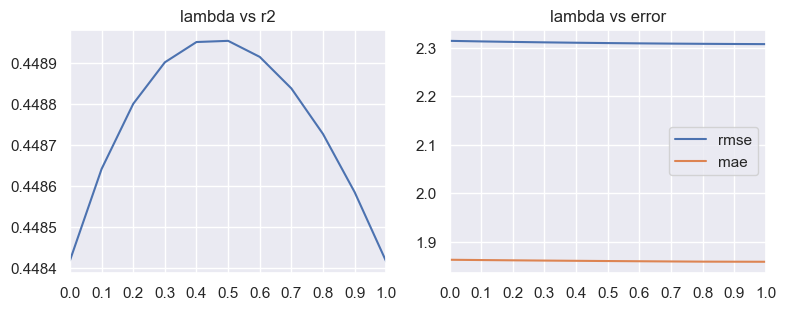

In [167]:
plt.subplot(1,2,1)
plt.plot(lambda_lst,r2_lst)
# plt.xticks(np.arange(0,len(lambda_lst),step=1))
plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1)
plt.title("lambda vs r2")

plt.subplot(1,2,2)
# plt.plot(lambda_lst,mse_lst, label="mse")
plt.plot(lambda_lst,rmse_lst, label="rmse")
plt.plot(lambda_lst,mae_lst, label="mae")
plt.legend()
# plt.xticks(np.arange(0,len(lambda_lst),step=1))
plt.xticks(np.linspace(0,1,11))
plt.xlim(0,1)
plt.title("lambda vs error")

print("Note: The cost function for Ridge won't decrease with increasing lambda, it increases")
print("Here we are just monitoring r2 and error")


In [168]:

print("If we select lambda at highest r2, then it's also fine")
print("because the error has decreased very minimally after that")
print("optimal lambda value: {}".format(lambda_lst[r2_lst.index(max(r2_lst))]))

print(f"Ridge_CV library gives alpha = {alpha:.2f}, manually we have {lambda_lst[r2_lst.index(max(r2_lst))]}")
print("I am very close. I get an idea how to do it manually")

If we select lambda at highest r2, then it's also fine
because the error has decreased very minimally after that
optimal lambda value: 0.5
Ridge_CV library gives alpha = 0.46, manually we have 0.5
I am very close. I get an idea how to do it manually


## Lasso Linear Regression

### Model

In [169]:
alphas = np.random.uniform(0, 1, 100)
lasso_cv = LassoCV(alphas = alphas, cv = 10, random_state=42) # normalize is depreciated from now on
# fixing random state does not seem to have any effect. Different function calls result in different alpha values!!
# anyway, I have checked that all the data has nearby scale so it's fine. We have transformed data too.
lasso_cv.fit(X_train_trans, y_train)

LassoCV(alphas=array([0.74335352, 0.48040061, 0.76623833, 0.56586181, 0.70968698,
       0.49138057, 0.91202608, 0.42009119, 0.70165516, 0.69738466,
       0.18372702, 0.12342177, 0.38679989, 0.40995269, 0.18372364,
       0.54788157, 0.79526378, 0.69256789, 0.27625829, 0.84672328,
       0.85438888, 0.89800657, 0.13766727, 0.16551452, 0.83699806,
       0.74798197, 0.2142896 , 0.77733681, 0.8662211 , 0.52510074,...
       0.79641241, 0.12633499, 0.78119639, 0.41527604, 0.26924311,
       0.5521458 , 0.85235401, 0.19319416, 0.21289592, 0.20202046,
       0.04689735, 0.45779617, 0.80947418, 0.82745718, 0.64504801,
       0.40661266, 0.50214718, 0.08783049, 0.67767048, 0.2757822 ,
       0.78248449, 0.12095895, 0.95594524, 0.89878096, 0.61481686,
       0.65529591, 0.87920573, 0.66721854, 0.47592719, 0.51870588]),
        cv=10, random_state=42)

In [170]:
alpha = lasso_cv.alpha_
alpha

0.0427869337268435

In [171]:
lasso_reg = Lasso(alpha=alpha, random_state=42) # alpha is lambda, ie, tuning parameter
lasso_reg

Lasso(alpha=0.0427869337268435, random_state=42)

In [172]:
lasso_reg.fit(X_train_trans, y_train)

Lasso(alpha=0.0427869337268435, random_state=42)

In [173]:
print("Coef: ", lasso_reg.coef_)
print("Intercept: ", lasso_reg.intercept_)
print("Score: ", lasso_reg.score(X_train_trans, y_train))

Coef:  [ 1.53978758  0.          0.28459408  3.86144684 -0.         -1.22574952]
Intercept:  32.77217103382967
Score:  0.5586183948802427


In [174]:
r2_crossval = np.mean(cross_val_score(lasso_reg,X_train_trans,y_train,scoring='r2',cv=10))
print("R2 with transformation: ",r2_crossval)

r2_all["lasso_reg"]=r2_crossval

R2 with transformation:  0.44755936598685925


In [175]:
r2_all

{'simple_reg': 0.4484185935605929,
 'ridge_reg': 0.4489573510026495,
 'lasso_reg': 0.44755936598685925}

In [176]:
adj_r2_all["lasso_reg"] = adj_r2(r2_crossval, df.shape[0], df.shape[1]-1)
adj_r2_all["lasso_reg"]

0.17997826877957368

In [177]:
adj_r2_all

{'simple_reg': 0.18076769017927197,
 'ridge_reg': 0.18126344970624797,
 'lasso_reg': 0.17997826877957368}

#### Observation
1. Better than simple reg, worse than ridge. Ridge has the best r2 score till now
2. Very low adjusted R2 score than R2 score suggests overfitting

### Prediction and check for assumptions of linear regression

In [178]:
y_pred = lasso_reg.predict(X_test_trans)

Right side is not good. Residuals should not follow a trend


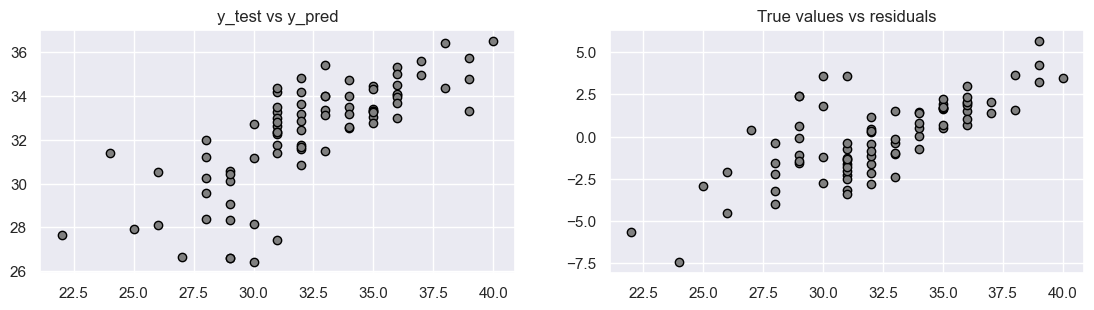

In [179]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(x=y_test, y=y_pred, color="grey", edgecolor="black")
plt.title("y_test vs y_pred")


plt.subplot(1,2,2)
plt.scatter(y_test,y_test-y_pred, color="grey", edgecolor="black")
plt.title("True values vs residuals")

print("Right side is not good. Residuals should not follow a trend")

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

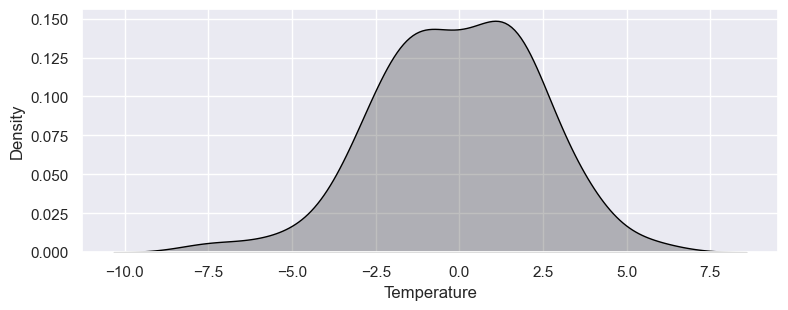

In [180]:
sns.set(rc={'figure.figsize':(8,3)})

sns.kdeplot(y_test-y_pred,color='black', lw=1, fill=True)

### Performance Metrics


In [181]:
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ = mean_absolute_error(y_test, y_pred)
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',rmse_)
print('MAE: ',mae_)

rmse_all["lasso_reg"]=rmse_
mae_all["lasso_reg"]=mae_

MSE:  5.419761797513113
RMSE:  2.32803818643791
MAE:  1.8921992984204712


In [182]:
rmse_all

{'simple_reg': 2.3145339969247063,
 'ridge_reg': 2.310206873551537,
 'lasso_reg': 2.32803818643791}

In [183]:
mae_all

{'simple_reg': 1.8632818998922562,
 'ridge_reg': 1.860834931544205,
 'lasso_reg': 1.8921992984204712}

#### Observation

1. Worst in all linear regression models. Ridge is the best in r2 score and prediction metrics till now
2. Very low adjusted R2 score than R2 score suggests overfitting

## Elastic Net Linear Regression

### Model

In [184]:
# alphas = np.random.uniform(0, 1, 100)

elasticNet_cv = ElasticNetCV(alphas = None, cv = 10, max_iter = 100000) # normalize is depreciated
# anyway, we have standarized the data in PowerTransformer(standard=True)
elasticNet_cv.fit(X_train_trans, y_train)

ElasticNetCV(cv=10, max_iter=100000)

In [185]:
alpha = elasticNet_cv.alpha_
alpha

0.016046514181860885

In [186]:
l1_ratio = elasticNet_cv.l1_ratio_
l1_ratio

0.5

In [187]:
elasticNet_reg = ElasticNet(alpha=alpha,  random_state=42) # alpha is lambda, ie, tuning parameter
elasticNet_reg

ElasticNet(alpha=0.016046514181860885, random_state=42)

In [188]:
elasticNet_reg.fit(X_train_trans, y_train)

ElasticNet(alpha=0.016046514181860885, random_state=42)

In [189]:
print("Coef: ", elasticNet_reg.coef_)
print("Intercept: ", elasticNet_reg.intercept_)
print("Score: ", elasticNet_reg.score(X_train_trans, y_train))

Coef:  [ 1.58812337  0.          0.65053694  3.74363546 -0.01104262 -1.66939983]
Intercept:  33.098315510409115
Score:  0.5618420456602948


In [190]:
r2_crossval = np.mean(cross_val_score(elasticNet_reg,X_train_trans,y_train,scoring='r2',cv=10))
print("R2 with transformation: ",r2_crossval)

r2_all["elasticNet_reg"]=r2_crossval

R2 with transformation:  0.44819963176609096


In [191]:
r2_all

{'simple_reg': 0.4484185935605929,
 'ridge_reg': 0.4489573510026495,
 'lasso_reg': 0.44755936598685925,
 'elasticNet_reg': 0.44819963176609096}

In [192]:
adj_r2_all["elasticNet_reg"] = adj_r2(r2_crossval, df.shape[0], df.shape[1]-1)
adj_r2_all["elasticNet_reg"]

0.1805663737266645

In [193]:
adj_r2_all

{'simple_reg': 0.18076769017927197,
 'ridge_reg': 0.18126344970624797,
 'lasso_reg': 0.17997826877957368,
 'elasticNet_reg': 0.1805663737266645}

#### Observation
1. ElasticNet or Ridge can be selected based on R2 score. Anyway, elasticNet is a combination of Lasso and Ridge
2. Very low adjusted R2 score than R2 score suggests overfitting

### Prediction and check for assumptions of linear regression

In [194]:
y_pred = elasticNet_reg.predict(X_test_trans)

Right side is not good. Residuals should not follow a trend


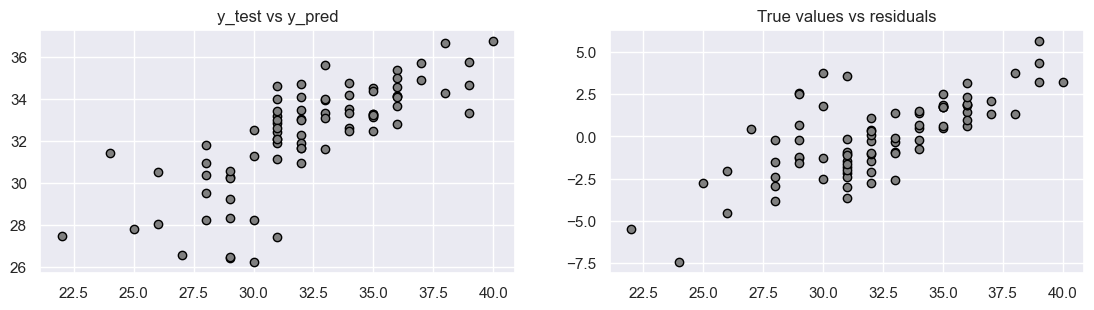

In [195]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.scatter(x=y_test, y=y_pred, color="grey", edgecolor="black")
plt.title("y_test vs y_pred")


plt.subplot(1,2,2)
plt.scatter(y_test,y_test-y_pred, color="grey", edgecolor="black")
plt.title("True values vs residuals")

print("Right side is not good. Residuals should not follow a trend")

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

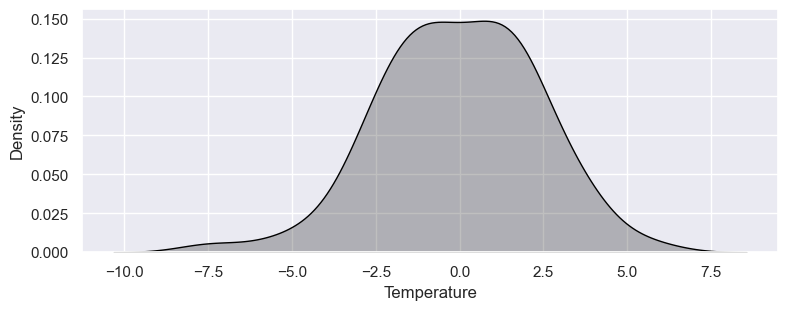

In [196]:
sns.set(rc={'figure.figsize':(8,3)})

sns.kdeplot(y_test-y_pred,color='black', lw=1, fill=True)

### Performance Metrics


In [197]:
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred))
mae_ = mean_absolute_error(y_test, y_pred)
print('MSE: ',mean_squared_error(y_test, y_pred))
print('RMSE: ',rmse_)
print('MAE: ',mae_)

rmse_all["elasticNet_reg"]=rmse_
mae_all["elasticNet_reg"]=mae_

MSE:  5.34445888519316
RMSE:  2.3118085745132877
MAE:  1.8656163368438208


In [198]:
rmse_all

{'simple_reg': 2.3145339969247063,
 'ridge_reg': 2.310206873551537,
 'lasso_reg': 2.32803818643791,
 'elasticNet_reg': 2.3118085745132877}

In [199]:
mae_all

{'simple_reg': 1.8632818998922562,
 'ridge_reg': 1.860834931544205,
 'lasso_reg': 1.8921992984204712,
 'elasticNet_reg': 1.8656163368438208}

In [200]:
r2_all

{'simple_reg': 0.4484185935605929,
 'ridge_reg': 0.4489573510026495,
 'lasso_reg': 0.44755936598685925,
 'elasticNet_reg': 0.44819963176609096}

In [201]:
adj_r2_all

{'simple_reg': 0.18076769017927197,
 'ridge_reg': 0.18126344970624797,
 'lasso_reg': 0.17997826877957368,
 'elasticNet_reg': 0.1805663737266645}

#### Observation

1. Worst in all linear regression models. Ridge is the best in r2 score and prediction metrics till now
2. Very low adjusted R2 score than R2 score suggests overfitting

# Final Observation

**Ridge** or Elastic Net can be selected as the best model out of all linear regression models. However, due to the nature of the dataset (originally a classification dataset, but forced for a regression problem), the R2 score is not great. Very low adjusted R2 score than R2 score suggests overfitting. Linear Regression is clearly not the best model for this dataset. However, I have checked the dependency in features extensively still the model is overfitted, this suggests that categorical features are creating this issue. We kept 'Classes' and removed 'Region' besed on experiments on how they affect adjusted R2 score. This problem statement itself is not suitable for linear regression to predict 'temperature' as it is originally a classification dataset to predict 'Classes'. Other ML models can increase the accuracy significantly. 

*Please share your work at (bhaviksharma.dpr@gmail.com) if you are able to make a better linear regression model out of this data (keep the title of the mail: Suggestion for better Regression model for AlgerianForestDataset to predict temperature).* 

**Don't share this code publicly as it contains my email ID**